# Analyzing Worldwide and Regional and CPI Score Changes from 2012 to 2021 

## Introduction

Corruption, at least to me, is one those things we want to eradicate yet it seems that no progress has been made. This assessment of "no progress" is likely based on seeing frequent news about politicians caught being corrupt or in some instances, politicians who were not caught but free to do as they please in spite of the evidence. I'm interested in seeing whether the data on corruption supports the view that unfortunately, no progress has been made on eradicating or more feasibly, reducing corruption.

Before that, I need to clarify the definition of corruption and how it impacts the questions to answer. The simplest definition comes from Transparency International, an institution dedicated to ending worldwide corruption, which defines corruption as ["the abuse of entrusted power for private gain"](https://www.transparency.org/en/what-is-corruption). But that simple definition might hide the fact that corruption encompassess multiple activities and more importantly, difficult to precisely compare i.e. generally, we might say person A is more corrupt than person B but can we precisely point the exact difference in corruption between the two, for example, in terms of numbers? 

Incidentally, to make it easier to compare corruption level and unify the multiple corruption measurements available, Transparecy International created the [Corruption Perception Index](https://www.transparency.org/en/cpi/) which scores a country's corruption based on ["at least 3 data sources drawn from 13 different corruption surveys and assessments"](https://www.transparency.org/en/news/how-cpi-scores-are-calculated). The CPI Index scores a country from 0 to 100 and the higher the value, the least corrupt the country is perceived to be.

By choosing the CPI Index as representative of corruption, the questions guiding this project will be as follows:

1. How has the worldwide average CPI score changed from 2012 to 2021?
2. Is the worldwide average CPI score in 2021 higher than in 2012?
3. How has the regional average CPI score changed from 2012 to 2021?
4. How many regions average CPI score are higher in 2021 than in 2012?

### Data Sets

The data sets used in this project can be downloaded from the [CPI](https://www.transparency.org/cpi) pages of the Transparency International website. Note there are 10 different pages with each corresponding to a year's data set. Other than that, some of the pages don't have direct links to the data sets and the data sets are stored in a zip file together with other data sets which are not relevant to this project. Also important is that a file might contain multiple data sets or sheets/tables; most of the time, this is because the file contains both the worldwide and regional CPI scores in a single file. In this project, I'll only focus on the worldwide CPI data set thus the regional scores will be removed.

The links for each year's CPI page followed by brief instructions on getting the relevant data set:

**2012**

1. Visit https://www.transparency.org/cpi/2012.
2. Under the Full 2012 Materials section, click the download button next to "CPI 2012 Data Set". [Direct download link](https://images.transparencycdn.org/images/CPI2012_Results.xls). 
3. There's only one file — `CPI2012_Results.xls`. I'll only use the worldwide `CPI 2012` sheet and not the regional sheets.

**2013**

1. Visit https://www.transparency.org/en/cpi/2013.
2. Under the Full 2013 Materials section, click the download button next to "CPI2013 Results". [Direct download link](https://images.transparencycdn.org/images/CPI2013_Results_2022-01-20-183035_stnh.xlsx).
3. There's only one file — `CPI2013_Results_2022-01-20-183035_stnh.xlsx` — and its only sheet `CPI 2013` fits the requirement of the project.

**2014**

1. Visit https://www.transparency.org/en/cpi/2014.
2. Under the Full 2014 Materials section, download the "CPI 2014 Data Set". [Direct download link](https://images.transparencycdn.org/images/CPI2014_Results.xlsx).
3. There's only one file — `CPI2014_Results.xlsx`. I'll only use the worldwide `CPI 2014` sheet and not the regional sheets.

**2015**

1. Visit https://www.transparency.org/en/cpi/2015.
2. Under the Full 2015 Materials section, click the download button next to "CPI 2015 Full Data Set 2022 01 18 145020 enyn". [Direct download link](https://images.transparencycdn.org/images/CPI_2015_FullDataSet_2022-01-18-145020_enyn_2022-01-20-180010_mabu.xlsx).
3. There's only one file – `CPI_2015_FullDataSet_2022-01-18-145020_enyn_2022-01-20-180010_mabu.xlsx`. I'll only use the worldwide `CPI 2015` sheet and not the regional sheets.

**2016**

1. Visit https://www.transparency.org/en/cpi/2016.
2. Under the Full 2016 Materials section, click the download button next to "CPI 2016 Data set". [Direct download link](https://images.transparencycdn.org/images/CPI2016_Results.xlsx).
3. There's only one file – `CPI2016_Results.xlsx`. I'll only use the worldwide `CPI2016_FINAL_16Jan` sheet and not the regional sheets nor the `CPI 2015-2016` sheet.

**2017**

1. Visit https://www.transparency.org/en/cpi/2017.
2. Under the Full 2017 Materials section, click the download button next to "CPI2017 Full Data Set". [Direct download link](https://images.transparencycdn.org/images/CPI2017_Full_DataSet-1801.xlsx).
3. There's only one file – `CPI2017_Full_DataSet-1801.xlsx`. I'll only use the worldwide `CPI 2017` sheet and not the regional sheets.

**2018**

1. Visit https://www.transparency.org/en/cpi/2018.
2. Under the Full 2018 Materials section, click the download button next to "CPI 2018 Full Results". [Direct download link](https://images.transparencycdn.org/images/CPI2018_Full-Results_1801.xlsx).
3. There's only one file – `CPI2018_Full-Results_1801.xlsx`. I'll only use the worldwide `CPI2018` sheet and not the regional sheets.

**2019**

1. Visit https://www.transparency.org/en/cpi/2019.
2. Under the Full 2019 Materials section, click the download button next to "CPI Full Data Set". [Direct download link](https://images.transparencycdn.org/images/CPI2019-1.xlsx).
3. There's only one file – `CPI2019-1.xlsx`. I'll only use the worldwide `CPI2019` sheet and not the regional sheets.

**2020**

1. Visit https://www.transparency.org/en/cpi/2020.
2. Under the Full 2020 Materials section, click the download button next to "CPI Full Data Set (.zip)". [Direct download link](https://images.transparencycdn.org/images/CPI_FULL_DATA_2021-01-27-162209.zip).
3. Unzip the folder.
4. There are two files – `CPI2020_GlobalTablesTS_210125.xlsx` and `CPI2020_SignificantChanges_210125.xlsx`. I'll be using the former. In that file, I'll only use the worldwide `CPI2020` sheet and not the regional sheets.

**2021**
1. Visit https://www.transparency.org/en/cpi/2021.
2. Under the Full 2021 Materials section, click the download button next to "CPI Full Data Set". [Direct download link](https://images.transparencycdn.org/images/CPI-2021-Full-Data-Set.zip).
3. Unzip the folder.
4. There are two files – `CPI2021_GlobalResults&Trends.xlsx` and `CPI2021_RegionalTables.xlsx`. I'll be using the former. In that file, I'll only use the worldwide `CPI 2021` sheet and not the regional sheets.


*Caveat: The above instructions are correct as of the 10th of October 2022.*

## Data Cleaning: Merging All Data Sets

The data sets structure is not consistent from one set to another. Aside from that, analyzing 10 separate data sets instead of just one can be tedious and error-prone.

Next, I'll go through each data set and merge two data sets at a time. Aside from that, to reduce the data cleaning work in the final data set, I'll also review some of the data set properties such as number of rows and columns along the way, and then, clean the data as needed.

### Preparing Year 2021

Let's start by loading the year 2021 file.

In [1]:
import pandas as pd
# Read from the excel file; ignore the first two rows because they are not headers
CPI_2021 = pd.read_excel("raw_datasets/CPI2021_GlobalResults&Trends.xlsx", sheet_name="CPI 2021", header=2)

# Review the data set
print(CPI_2021.shape)
CPI_2021

(180, 22)


,Country / Territory,ISO3,Region,CPI score 2021,Rank,Standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,...,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit,Global Insights Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index
0,Denmark,DNK,WE/EU,88,1,1.850507,8,84.955920,91.04408,NaN,...,90.0,NaN,83,93.0,NaN,100.0,79.0,NaN,78.0,87.0
1,Finland,FIN,WE/EU,88,1,1.248280,8,85.946580,90.05342,NaN,...,90.0,NaN,83,94.0,NaN,93.0,77.0,NaN,91.0,87.0
2,New Zealand,NZL,AP,88,1,1.427644,8,85.651530,90.34847,NaN,...,90.0,NaN,83,91.0,NaN,93.0,78.0,NaN,85.0,83.0
3,Norway,NOR,WE/EU,85,4,1.072085,7,83.236420,86.76358,NaN,...,90.0,NaN,83,81.0,NaN,85.0,78.0,NaN,NaN,87.0
4,Singapore,SGP,AP,85,4,1.159654,9,83.092370,86.90763,NaN,...,90.0,NaN,83,87.0,91.0,85.0,78.0,NaN,91.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Yemen,YEM,MENA,16,174,2.292554,7,12.228750,19.77125,NaN,...,20.0,NaN,10,NaN,NaN,15.0,12.0,10.0,34.0,NaN
176,Venezuela,VEN,AME,14,177,0.991130,8,12.369590,15.63041,NaN,...,20.0,NaN,10,20.0,NaN,15.0,12.0,NaN,13.0,10.0
177,Somalia,SOM,SSA,13,178,1.891675,6,9.888195,16.11180,11.0,...,NaN,NaN,22,NaN,NaN,6.0,12.0,18.0,NaN,NaN
178,Syria,SYR,MENA,13,178,1.578473,5,10.403410,15.59659,NaN,...,20.0,NaN,10,NaN,NaN,15.0,12.0,NaN,NaN,NaN


Note that for the more recent years, Transparency International standardized the number of countries for their worldwide ranking to the top 180 countries in terms of CPI score. Thus, the 180 number of rows is as expected.

Looking at the columns, I can see that not all of them are relevant to this project. I'll only keep the following columns:

1. Country/Territory
2. ISO3
3. Region
4. CPI score 2021
5. Rank

In [2]:
# Pick the first 5 columns
CPI_2021 = CPI_2021.iloc[:, :5]

# Review modified data frame
CPI_2021

,Country / Territory,ISO3,Region,CPI score 2021,Rank
0,Denmark,DNK,WE/EU,88,1
1,Finland,FIN,WE/EU,88,1
2,New Zealand,NZL,AP,88,1
3,Norway,NOR,WE/EU,85,4
4,Singapore,SGP,AP,85,4
...,...,...,...,...,...
175,Yemen,YEM,MENA,16,174
176,Venezuela,VEN,AME,14,177
177,Somalia,SOM,SSA,13,178
178,Syria,SYR,MENA,13,178


Before moving to the next data set, I'm going to rename some of the columns for easier references later.

In [3]:
# Rename some of the columns
CPI_2021.rename(columns={ "Country / Territory": "Country", "Rank": "Rank 2021", "CPI score 2021": "CPI Score 2021"}, 
                inplace=True)

CPI_2021.columns

Index(['Country', 'ISO3', 'Region', 'CPI Score 2021', 'Rank 2021'], dtype='object')

### Preparing Year 2020 and Merging with Year 2021

#### Load the year 2020 data set and select relevant columns

Unfortunately, for unknown reasons, the year 2020 file — `raw_datasets/CPI2020_GlobalTablesTS_210125.xlsx` — can't be loaded by the same function I used for year 2021. It could be a [malformed](https://github.com/pandas-dev/pandas/issues/39250#issuecomment-762380350) `.xlsx` file but I can't say for sure.

The simplest fix is to save the file as an `.xls` file using a spreadsheet editor. I'm using the Numbers software on my Mac and here's a [general guide](https://support.apple.com/en-my/guide/numbers/tan3b922d4ad/mac) on converting a file into a different format. In Excel, this [answer](https://answers.microsoft.com/en-us/msoffice/forum/all/converting-xlsx-workbook-to-xls-format-in-excel/ece28ab5-1386-4421-b424-dba673a75708) on the Microsoft forum could be useful. Another option is to download the file I've processed on my computer: here's a [link](https://github.com/wanzulfikri/cpi_analysis/blob/main/processed_datasets/CPI2020_GlobalTablesTS_210125%202.xls) to the processed file after converting it with Numbers.

In the end, the new file will be named `CPI2020_GlobalTablesTS_210125.xls`.

In [4]:
CPI_2020 = pd.read_excel("processed_datasets/CPI2020_GlobalTablesTS_210125.xls", sheet_name="CPI2020", header=2)

# Review the data set
print(CPI_2020.shape)
CPI_2020

(180, 22)


,Country,ISO3,Region,CPI score 2020,Rank,Standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,...,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit,Global Insight Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index
0,Denmark,DNK,WE/EU,88,1,1.775809,8,85.087670,90.91233,NaN,...,90.0,NaN,83,94.0,NaN,98.0,78.0,NaN,79.0,86.0
1,New Zealand,NZL,AP,88,1,1.479342,8,85.573880,90.42612,NaN,...,90.0,NaN,83,92.0,NaN,93.0,77.0,NaN,89.0,82.0
2,Finland,FIN,WE/EU,85,3,1.748594,8,82.132310,87.86769,NaN,...,72.0,NaN,83,91.0,NaN,93.0,77.0,NaN,93.0,86.0
3,Singapore,SGP,AP,85,3,1.203239,9,83.026690,86.97331,NaN,...,90.0,NaN,83,91.0,90.0,85.0,77.0,NaN,89.0,85.0
4,Sweden,SWE,WE/EU,85,3,1.303953,8,82.861520,87.13848,NaN,...,90.0,NaN,83,84.0,NaN,93.0,77.0,NaN,77.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,VEN,AME,15,176,0.914430,8,13.500340,16.49966,NaN,...,20.0,NaN,10,20.0,NaN,15.0,16.0,NaN,16.0,13.0
176,Yemen,YEM,MENA,15,176,1.333599,7,12.812900,17.18710,NaN,...,20.0,NaN,10,NaN,NaN,15.0,13.0,10.0,23.0,NaN
177,Syria,SYR,MENA,14,178,1.576392,5,11.414720,16.58528,NaN,...,20.0,NaN,10,NaN,NaN,15.0,15.0,NaN,NaN,NaN
178,Somalia,SOM,SSA,12,179,2.292273,6,8.240673,15.75933,4.0,...,NaN,NaN,22,NaN,NaN,6.0,15.0,18.0,NaN,NaN


Similar to before, the number of rows match the 180 country limit, and the headers and values look fine at least on a cursory look.

I'll also keep the following columns and discard the rest:

1. Country
2. ISO3
3. Region
4. CPI score 2020
5. Rank

Plus, renaming as usual.

In [5]:
# Pick the first 5 columns
CPI_2020 = CPI_2020.iloc[:, :5]

# Rename some of the columns
CPI_2020.rename(columns={ "Rank": "Rank 2020", "CPI score 2020": "CPI Score 2020"}, 
                inplace=True)

# Review modified data frame
CPI_2020

,Country,ISO3,Region,CPI Score 2020,Rank 2020
0,Denmark,DNK,WE/EU,88,1
1,New Zealand,NZL,AP,88,1
2,Finland,FIN,WE/EU,85,3
3,Singapore,SGP,AP,85,3
4,Sweden,SWE,WE/EU,85,3
...,...,...,...,...,...
175,Venezuela,VEN,AME,15,176
176,Yemen,YEM,MENA,15,176
177,Syria,SYR,MENA,14,178
178,Somalia,SOM,SSA,12,179


#### Merge year 2021 dataset with the year 2020 dataset

To merge the two, I'll match the rows of each dataset on the `Country`, `ISO3`, and `Region` column; this is because the each country has the same values for those 3 columns in both the datasets.

But there might be instances in which one country is available in one data set but missing in another. To preserve those countries, I'll include them in the final data set but they'll be missing CPI score for at least one year. This is inevitable considering that even if a country has a CPI score (which can be found in supplementary data sets), it'll not be included in the global data set because of the 180 country limit per year.

For the purpose of this project, I'll only include data from the global data set only. Word of caution: this limits the representativity of the analysis results to only those countries that happen to be in the global list. Noting that limitation is essential because I'll also calculate the regional CPI score and that score might be inflated or deflated depending on which countries in the region are not included in the global data set. Because countries with very low CPI score will be excluded because they rank higher than 180, the analysis results will likely overestimate worlwide and regional CPI score.

Now that the crucial limitation is out in the open, I'll proceed with the merging.

In [6]:
# CPI will store the CPI data for all years
CPI = CPI_2021.merge(CPI_2020, how="outer", on=["Country", "ISO3", "Region"])
CPI

,Country,ISO3,Region,CPI Score 2021,Rank 2021,CPI Score 2020,Rank 2020
0,Denmark,DNK,WE/EU,88.0,1.0,88.0,1.0
1,Finland,FIN,WE/EU,88.0,1.0,85.0,3.0
2,New Zealand,NZL,AP,88.0,1.0,88.0,1.0
3,Norway,NOR,WE/EU,85.0,4.0,84.0,7.0
4,Singapore,SGP,AP,85.0,4.0,85.0,3.0
...,...,...,...,...,...,...,...
177,Somalia,SOM,SSA,13.0,178.0,12.0,179.0
178,Syria,SYR,MENA,13.0,178.0,14.0,178.0
179,South Sudan,SSD,SSA,11.0,180.0,12.0,179.0
180,Brunei Darussalam,BRN,AP,NaN,NaN,60.0,35.0


### Preparing Year 2019 Data Set and Merging with Combined Data Set

#### Load the year 2019 data set and select relevant columns

Let's load the 2019's data set from `CPI2019-1.xlsx`.

In [7]:
# Load year 2019 data set
CPI_2019 = pd.read_excel("raw_datasets/CPI2019-1.xlsx", sheet_name="CPI2019", header=2)

# Review the data set
print(CPI_2019.shape)
CPI_2019

(180, 22)


,Country,ISO3,Region,CPI score 2019,Rank,standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,...,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit Ratings,Global Insight Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index
0,Denmark,DNK,WE/EU,87,1,2.542474,8,82.830350,91.16965,NaN,...,90.0,NaN,83,94.0,NaN,93.0,77.0,NaN,79.0,86.0
1,New Zealand,NZL,AP,87,1,2.286490,8,83.250150,90.74985,NaN,...,90.0,NaN,83,83.0,NaN,93.0,77.0,NaN,89.0,82.0
2,Finland,FIN,WE/EU,86,3,2.924511,8,81.203800,90.79620,NaN,...,72.0,NaN,83,94.0,NaN,93.0,75.0,NaN,93.0,87.0
3,Singapore,SGP,AP,85,4,2.048400,9,81.640630,88.35938,NaN,...,90.0,NaN,83,91.0,89.0,85.0,77.0,NaN,89.0,85.0
4,Sweden,SWE,WE/EU,85,4,1.977693,8,81.756580,88.24342,NaN,...,90.0,NaN,83,84.0,NaN,93.0,78.0,NaN,77.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,VEN,AME,16,173,2.048858,8,12.639870,19.36013,NaN,...,20.0,NaN,10,23.0,NaN,15.0,25.0,NaN,16.0,13.0
176,Yemen,YEM,MENA,15,177,1.885994,7,11.906970,18.09303,NaN,...,20.0,NaN,10,NaN,NaN,15.0,13.0,10.0,23.0,NaN
177,Syria,SYR,MENA,13,178,1.921515,5,9.848716,16.15128,NaN,...,20.0,NaN,10,NaN,NaN,15.0,13.0,NaN,NaN,NaN
178,South Sudan,SSD,SSA,12,179,1.263942,5,9.927135,14.07286,11.0,...,NaN,NaN,10,NaN,NaN,NaN,13.0,10.0,NaN,NaN


As always, the number of rows matches the 180 country limit, and the headers and values look fine at least on a cursory look.

I'll also keep the following columns and rename them:

- Country
- ISO3
- Region
- CPI score 2019
- Rank

In [8]:
# Pick the first 5 columns
CPI_2019 = CPI_2019.iloc[:, :5]

# Rename some of the columns
CPI_2019.rename(columns={ "Rank": "Rank 2019", "CPI score 2019": "CPI Score 2019"}, 
                inplace=True)

# Review modified data frame
CPI_2019

,Country,ISO3,Region,CPI Score 2019,Rank 2019
0,Denmark,DNK,WE/EU,87,1
1,New Zealand,NZL,AP,87,1
2,Finland,FIN,WE/EU,86,3
3,Singapore,SGP,AP,85,4
4,Sweden,SWE,WE/EU,85,4
...,...,...,...,...,...
175,Venezuela,VEN,AME,16,173
176,Yemen,YEM,MENA,15,177
177,Syria,SYR,MENA,13,178
178,South Sudan,SSD,SSA,12,179


#### Merge the year 2019 data set with the combined data set

I'll merge the year 2019 data set following the same logic as the previous merge i.e. 2021 merged with 2020.

In [9]:
# Merge year 2019 with combined data set
CPI = CPI.merge(CPI_2019, how="outer", on=["Country", "ISO3", "Region"])
CPI

,Country,ISO3,Region,CPI Score 2021,Rank 2021,CPI Score 2020,Rank 2020,CPI Score 2019,Rank 2019
0,Denmark,DNK,WE/EU,88.0,1.0,88.0,1.0,87.0,1.0
1,Finland,FIN,WE/EU,88.0,1.0,85.0,3.0,86.0,3.0
2,New Zealand,NZL,AP,88.0,1.0,88.0,1.0,87.0,1.0
3,Norway,NOR,WE/EU,85.0,4.0,84.0,7.0,84.0,7.0
4,Singapore,SGP,AP,85.0,4.0,85.0,3.0,85.0,4.0
...,...,...,...,...,...,...,...,...,...
178,Syria,SYR,MENA,13.0,178.0,14.0,178.0,13.0,178.0
179,South Sudan,SSD,SSA,11.0,180.0,12.0,179.0,12.0,179.0
180,Brunei Darussalam,BRN,AP,NaN,NaN,60.0,35.0,60.0,35.0
181,Côte d'Ivoire,CIV,SSA,NaN,NaN,36.0,104.0,NaN,NaN


### Preparing Year 2018 Data Set and Merging with Combined Data Set

#### Load the year 2018 data set and select relevant columns

Let's load the 2018 data set from `CPI2018_Full-Results_1801.xlsx`.

In [10]:
# Load year 2018 data set
CPI_2018 = pd.read_excel("raw_datasets/CPI2018_Full-Results_1801.xlsx", sheet_name="CPI2018", header=2)

# Review the data set
print(CPI_2018.shape)
CPI_2018

(180, 22)


,Country,ISO3,Region,CPI Score 2018,Rank,Standard error,Number of sources,Upper CI,Lower CI,African Development Bank CPIA,...,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit Ratings,Global Insight Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index,Varieties of Democracy Project
0,Denmark,DNK,WE/EU,88,1,2.63,8,92,84,NaN,...,90.0,NaN,83,97.0,NaN,92.0,NaN,79.0,88.0,78.0
1,New Zealand,NZL,AP,87,2,2.44,8,91,83,NaN,...,90.0,NaN,83,92.0,NaN,93.0,NaN,83.0,82.0,77.0
2,Finland,FIN,WE/EU,85,3,2.74,8,89,81,NaN,...,72.0,NaN,83,93.0,NaN,93.0,NaN,90.0,86.0,76.0
3,Singapore,SGP,AP,85,3,1.98,9,88,82,NaN,...,90.0,NaN,83,90.0,89.0,85.0,NaN,90.0,85.0,78.0
4,Sweden,SWE,WE/EU,85,3,2.02,8,88,82,NaN,...,90.0,NaN,83,81.0,NaN,93.0,NaN,77.0,86.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,"Korea, North",PRK,AP,14,176,1.39,4,16,12,NaN,...,NaN,NaN,10,NaN,NaN,15.0,NaN,NaN,NaN,17.0
176,Yemen,YEM,MENA,14,176,1.45,7,16,12,NaN,...,20.0,NaN,10,NaN,NaN,15.0,10.0,17.0,NaN,12.0
177,South Sudan,SSD,SSA,13,178,1.86,5,16,10,9.0,...,NaN,NaN,10,NaN,NaN,NaN,10.0,NaN,NaN,17.0
178,Syria,SYR,MENA,13,178,1.92,5,16,10,NaN,...,20.0,NaN,10,NaN,NaN,15.0,NaN,NaN,NaN,13.0


As always, the number of rows matches the 180 country limit, and the headers and values look fine at least on a cursory look.

I'll also keep the following columns and rename them (if necessary):

- Country
- ISO3
- Region
- CPI Score 2018
- Rank

In [11]:
# Pick the first 5 columns
CPI_2018 = CPI_2018.iloc[:, :5]

# Rename one of the columns
CPI_2018.rename(columns={ "Rank": "Rank 2018"}, 
                inplace=True)

# Review modified data frame
CPI_2018

,Country,ISO3,Region,CPI Score 2018,Rank
0,Denmark,DNK,WE/EU,88,1
1,New Zealand,NZL,AP,87,2
2,Finland,FIN,WE/EU,85,3
3,Singapore,SGP,AP,85,3
4,Sweden,SWE,WE/EU,85,3
...,...,...,...,...,...
175,"Korea, North",PRK,AP,14,176
176,Yemen,YEM,MENA,14,176
177,South Sudan,SSD,SSA,13,178
178,Syria,SYR,MENA,13,178


#### Merge the year 2018 data set with the combined data set

I'll merge the year 2018 data set following the same logic as the previous merges.

In [12]:
# Merge year 2018 with combined data set
CPI = CPI.merge(CPI_2018, how="outer", on=["Country", "ISO3", "Region"])
CPI_2018.rename(columns={ "Rank": "Rank 2018"}, 
                inplace=True)

The merge was mostly successful but oddly, the "Rank" column was not renamed to "Rank 2018". The first thing I can do is inspect the column names of the year 2018 data set.

In [13]:
# Show all column names for the year 2018 data set
CPI_2018.columns

Index(['Country', 'ISO3', 'Region', 'CPI Score 2018', 'Rank '], dtype='object')

There's an extra white space after 'Rank'. The lesson here moving forward is I'll need to strip leading and trailing white spaces from the column names before renaming and merging.

In [14]:
# Rename again but this time taking into account the trailing white space
CPI.rename(columns={ "Rank ": "Rank 2018"}, 
                inplace=True)
CPI.columns

Index(['Country', 'ISO3', 'Region', 'CPI Score 2021', 'Rank 2021',
       'CPI Score 2020', 'Rank 2020', 'CPI Score 2019', 'Rank 2019',
       'CPI Score 2018', 'Rank 2018'],
      dtype='object')

### Preparing Year 2017 Data Set and Merging with Combined Data Set

#### Load the year 2017 data set and select relevant columns

Let's load the 2017 data set from `CPI2017_Full_DataSet-1801.xlsx`.

In [15]:
# Load year 2017 data set
CPI_2017 = pd.read_excel("raw_datasets/CPI2017_Full_DataSet-1801.xlsx", sheet_name="CPI 2017", header=2)

CPI_2017.columns = CPI_2017.columns.str.strip()

# Review the data set
print(CPI_2017.shape)
CPI_2017

(182, 9)


,Country,ISO3,Region,CPI Score 2017,Rank,standard error,Lower CI,Upper CI,number of sources
0,New Zealand,NZL,AP,89.000000,1.0,2.40,85.0,93.0,8.0
1,Denmark,DNK,WE/EU,88.000000,2.0,2.75,83.0,93.0,8.0
2,Finland,FIN,WE/EU,85.000000,3.0,2.84,80.0,90.0,8.0
3,Norway,NOR,WE/EU,85.000000,3.0,1.83,82.0,88.0,8.0
4,Switzerland,CHE,WE/EU,85.000000,3.0,1.71,82.0,88.0,7.0
...,...,...,...,...,...,...,...,...,...
177,Syria,SYR,MENA,14.000000,178.0,1.93,11.0,17.0,5.0
178,South Sudan,SSD,SSA,12.000000,179.0,1.56,9.0,15.0,5.0
179,Somalia,SOM,SSA,9.000000,180.0,2.26,5.0,13.0,5.0
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


182 is more than the expected 180 country limit. It's possible that Transparency International extended the limit for this data set, but on further review I can see that there are two non-country rows. Both of them are the last two rows in the data set.

The first is just a row with all null/missing values; it's most likely an intentional empty row to separate the country rows from the global average row. The second is the global average row which calculates the average CPI score for all 180 countries in the year 2017; it is is not necessary in this project because I'll do a similar calculation in this project.

In [16]:
# Keep all rows except the last two
CPI_2017 = CPI_2017.iloc[:-2]

print(CPI_2017.shape[0])
CPI_2017.tail()

180


,Country,ISO3,Region,CPI Score 2017,Rank,standard error,Lower CI,Upper CI,number of sources
175,Yemen,YEM,MENA,16.0,175.0,1.85,13.0,19.0,7.0
176,Afghanistan,AFG,AP,15.0,177.0,1.39,13.0,17.0,5.0
177,Syria,SYR,MENA,14.0,178.0,1.93,11.0,17.0,5.0
178,South Sudan,SSD,SSA,12.0,179.0,1.56,9.0,15.0,5.0
179,Somalia,SOM,SSA,9.0,180.0,2.26,5.0,13.0,5.0


Now that the two non-country rows have been removed, the number of rows now matches the expected 180 number of countries.

Next is selecting only the columns needed for the project:
- Country
- ISO3
- Region
- CPI Score 2017
- Rank

In [17]:
# Pick the first 5 columns
CPI_2017 = CPI_2017.iloc[:, :5]
print(CPI_2017.columns)
# Rename one of the columns
CPI_2017.rename(columns={ "Rank": "Rank 2017"}, 
                inplace=True)

# Review modified data frame
CPI_2017

Index(['Country', 'ISO3', 'Region', 'CPI Score 2017', 'Rank'], dtype='object')


,Country,ISO3,Region,CPI Score 2017,Rank 2017
0,New Zealand,NZL,AP,89.0,1.0
1,Denmark,DNK,WE/EU,88.0,2.0
2,Finland,FIN,WE/EU,85.0,3.0
3,Norway,NOR,WE/EU,85.0,3.0
4,Switzerland,CHE,WE/EU,85.0,3.0
...,...,...,...,...,...
175,Yemen,YEM,MENA,16.0,175.0
176,Afghanistan,AFG,AP,15.0,177.0
177,Syria,SYR,MENA,14.0,178.0
178,South Sudan,SSD,SSA,12.0,179.0


#### Merge the year 2017 data set with the combined data set

I'll merge the year 2017 data set following the same logic as the previous merges.

In [18]:
# Merge year 2017 with combined data set
CPI = CPI.merge(CPI_2017, how="outer", on=["Country", "ISO3", "Region"])
CPI

,Country,ISO3,Region,CPI Score 2021,Rank 2021,CPI Score 2020,Rank 2020,CPI Score 2019,Rank 2019,CPI Score 2018,Rank 2018,CPI Score 2017,Rank 2017
0,Denmark,DNK,WE/EU,88.0,1.0,88.0,1.0,87.0,1.0,88.0,1.0,88.0,2.0
1,Finland,FIN,WE/EU,88.0,1.0,85.0,3.0,86.0,3.0,85.0,3.0,85.0,3.0
2,New Zealand,NZL,AP,88.0,1.0,88.0,1.0,87.0,1.0,87.0,2.0,89.0,1.0
3,Norway,NOR,WE/EU,85.0,4.0,84.0,7.0,84.0,7.0,84.0,7.0,85.0,3.0
4,Singapore,SGP,AP,85.0,4.0,85.0,3.0,85.0,4.0,85.0,3.0,84.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Côte d'Ivoire,CIV,SSA,NaN,NaN,36.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN
182,Czech Republic,CZE,WE/EU,NaN,NaN,NaN,NaN,56.0,44.0,59.0,38.0,57.0,42.0
183,Swaziland,SWZ,SSA,NaN,NaN,NaN,NaN,NaN,NaN,38.0,89.0,39.0,85.0
184,Macedonia,MKD,ECA,NaN,NaN,NaN,NaN,NaN,NaN,37.0,93.0,35.0,107.0


### Preparing Year 2016 Data Set and Merging with Combined Data Set

#### Load the year 2016 data set and select relevant columns

Let's load the 2016 data set from `CPI2016_Results.xlsx`.

In [19]:
import warnings

# Silence Conditional Formatting extension warning
warnings.simplefilter("ignore")

# Load year 2016 data set
CPI_2016 = pd.read_excel("raw_datasets/CPI2016_Results.xlsx", sheet_name="CPI2016_FINAL_16Jan")

# Re-enable the warning to default; it's possible for the other data sets to have an actual problem
warnings.simplefilter("default")

# 
CPI_2016.columns = CPI_2016.columns.str.strip()

# Review the data set
print(CPI_2016.shape)
CPI_2016

(176, 32)


,Country,CPI2016,Rank,Region,WB Code,World Bank CPIA,World Economic Forum EOS,Global Insight Country Risk Ratings,Bertelsmann Foundation Transformation Index,African Development Bank CPIA,...,Std Error 2016,Lower CI,Upper CI,Min,Max,OECD,G20,BRICS,EU,Arab states
0,New Zealand,90,1,AP,NZL,NaN,90.0,83,NaN,NaN,...,2.56,86,94,79,99,y,NaN,NaN,NaN,NaN
1,Denmark,90,1,WE/EU,DNK,NaN,85.0,83,NaN,NaN,...,2.46,86,94,83,99,y,NaN,NaN,y,NaN
2,Finland,89,3,WE/EU,FIN,NaN,91.0,83,NaN,NaN,...,1.46,87,92,83,94,y,NaN,NaN,y,NaN
3,Sweden,88,4,WE/EU,SWE,NaN,86.0,83,NaN,NaN,...,1.33,85,90,83,93,y,NaN,NaN,y,NaN
4,Switzerland,86,5,WE/EU,CHE,NaN,80.0,83,NaN,NaN,...,1.57,83,89,80,90,y,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Sudan,14,170,SSA,SDN,2.0,NaN,22,16.0,11.0,...,2.99,9,19,2,22,NaN,NaN,NaN,NaN,y
172,Syria,13,173,MENA,SYR,NaN,NaN,10,8.0,NaN,...,1.97,10,16,8,19,NaN,NaN,NaN,NaN,y
173,Korea (North),12,174,AP,PRK,NaN,NaN,10,12.0,NaN,...,1.39,10,15,10,15,NaN,NaN,NaN,NaN,NaN
174,South Sudan,11,175,SSA,SSD,2.0,NaN,10,16.0,5.0,...,3.21,5,16,2,19,NaN,NaN,NaN,NaN,NaN


Year 2016 is the last year Transparency International did not standardize the 180 country limit. We will see similar patterns in the earlier years as well. The 176 number of rows is expected and it corresponds to the following excerpt from the [CPI 2016 page](https://www.transparency.org/en/cpi/2016):

> Over two-thirds of the **176 countries and territories** in this year's index fall below the midpoint of our scale of 0 (highly corrupt) to 100 (very clean).

Even though the data seems fine, there's actuallya  Conditional Formatting extension warning that I've already silenced. [Conditional Formatting](https://support.microsoft.com/en-us/office/use-conditional-formatting-to-highlight-information-fed60dfa-1d3f-4e13-9ecb-f1951ff89d7f) is not relevant for this project because I'm not viewing the sheet directly nor am I going to highlight anything in the data frame according to the conditional formatting rules. Other than that, no Conditional Formatting rules in the sheet are used to provide information relevant for this project.

**From ISO3 to WB code**

Next, I'll need to point out another significant difference in the 2016 data set compared to the later years: countries are given a WB code instead of ISO3. The ISO3, or specifically [ISO 3166-1 alpha-3](https://www.iso.org/iso-3166-country-codes.html), is a standard used to represent a country with three-letter country codes. WB code, which presumably means World Bank code, is a term I wasn't able to learn more about even after reading the methodology documentations (refer: [Short](https://images.transparencycdn.org/images/CPI_2016_ShortMethodologyNote_EN.pdf) and [Technical](https://images.transparencycdn.org/images/CPI_2016_TechnicalMethodologyNote_EN.pdf)) for the data set.

The closest source would be this [Country Codes](https://wits.worldbank.org/wits/wits/witshelp/content/codes/country_codes.htm) which mentions the following:

> The country code table includes the WITS System country names for statistical purposes and both the **International Standards Organization (ISO) 3-digit alphabetic codes** and the United Nations Statistics Division (UNSD) 3-digit equivalent numeric codes. The names and codes are used in all of the three databases. 

The above implies WB code is exactly the same as ISO3. But I'm not confident that that's the case, so I would like to confirm that if there's no difference between the two at least in terms of Transparency International classification.

Before that, let's select only the following columns and rename them accordingly:

- Country
- Region
- CPI2016
- Rank
- WB code


In [20]:
# Pick the first 5 columns
CPI_2016 = CPI_2016.iloc[:, :5]
print(CPI_2016.columns)
# Rename some of the columns
CPI_2016.rename(columns={ "Rank": "Rank 2016", "CPI2016": "CPI Score 2016"}, 
                inplace=True)
# Review modified data frame
CPI_2016

Index(['Country', 'CPI2016', 'Rank', 'Region', 'WB Code'], dtype='object')


,Country,CPI Score 2016,Rank 2016,Region,WB Code
0,New Zealand,90,1,AP,NZL
1,Denmark,90,1,WE/EU,DNK
2,Finland,89,3,WE/EU,FIN
3,Sweden,88,4,WE/EU,SWE
4,Switzerland,86,5,WE/EU,CHE
...,...,...,...,...,...
171,Sudan,14,170,SSA,SDN
172,Syria,13,173,MENA,SYR
173,Korea (North),12,174,AP,PRK
174,South Sudan,11,175,SSA,SSD


**Preliminary Merging to Investigate ISO3 and WB code difference**

Let us see if there's any difference between ISO3 and WB code.


In [21]:
# Merge year 2016 with combined data set
ISO3_WB_comparison = CPI.merge(CPI_2016, how="outer", on=["Country", "Region"])
iso3_wb_mask = ISO3_WB_comparison['ISO3'] != ISO3_WB_comparison['WB Code']
ISO3_WB_comparison[iso3_wb_mask][['ISO3', 'WB Code']]

,ISO3,WB Code
22,SYC,NaN
27,USA,NaN
31,KOR,NaN
37,VCT,NaN
38,CPV,NaN
46,FJI,NaN
48,CZE,NaN
64,MNE,MON
66,ROU,ROM
68,VUT,NaN


There is a lot to unpack here. I'm going to split the observations into multiple categories:

1. Both ISO3 and WB code are available
2. Only ISO3 is available
3. Only WB code is available

**Both ISO3 and WB code are available**

There are cases that even if both codes are available, the codes do not match each other. This proves that the ISO3 and WB Code do not necessarily agree with each other.

In [22]:
# Isolate rows with which ISO3 and WB Code values are available
iso3_wb_both_available_mask = ISO3_WB_comparison['ISO3'].notnull() & ISO3_WB_comparison['WB Code'].notnull()
both_available = ISO3_WB_comparison[iso3_wb_both_available_mask][['ISO3', 'WB Code']]

# Get those rows with non-matching ISO3 and WB Code
iso3_wb_both_not_match_mask = both_available['ISO3'] != both_available['WB Code']
both_available[iso3_wb_both_not_match_mask]

,ISO3,WB Code
64,MNE,MON
66,ROU,ROM
86,KSV,LWI
99,SRB,SCG


For the above cases, I'll only use the ISO3 value and ignore the WB code in the combined data frame. Though, I will reserve that transformation later when I have surveyed all categories.

**Only ISO3 is available**

When this happens, it means that the countries are available in the 2021 - 2017 data sets but not available in the 2016 data set.

In [23]:
# Isolate rows with which only ISO3 is available
iso3_wb_iso3_available_mask = ISO3_WB_comparison['ISO3'].notnull() & ISO3_WB_comparison['WB Code'].isnull()
ISO3_available = ISO3_WB_comparison[iso3_wb_iso3_available_mask][['ISO3', 'WB Code']]

# Review those rows with only ISO3 available
print(ISO3_available.shape[0])
ISO3_available[['ISO3', 'WB Code']]

21


,ISO3,WB Code
22,SYC,NaN
27,USA,NaN
31,KOR,NaN
37,VCT,NaN
38,CPV,NaN
46,FJI,NaN
48,CZE,NaN
68,VUT,NaN
91,MKD,NaN
104,CIV,NaN


There are 21 countries with only ISO3 values. It is okay to leave them as is because I do not need to reconcile any difference in country codes. Other than that, I am going to stick with ISO3 because that's the standard Transparency International adheres to in their recent data sets.

**Only WB Code is available**

The rows in this category requires further inspection. Because I am using ISO3, I will need to check if the WB Code corresponds to the current ISO3 code. If it does not, I'll have to replace the WB code with the appropriate ISO3 code.

In [24]:
# Isolate rows with which only WB Code is available
iso3_wb_wb_code_available_mask = ISO3_WB_comparison['ISO3'].isnull() & ISO3_WB_comparison['WB Code'].notnull()
WB_available = ISO3_WB_comparison[iso3_wb_wb_code_available_mask][['ISO3', 'WB Code']]

# Review those rows with only WB Code available
print(WB_available.shape[0])
WB_available[['ISO3', 'WB Code']]

11


,ISO3,WB Code
186,NaN,USA
187,NaN,VCT
188,NaN,CPV
189,NaN,BRN
190,NaN,KOR
191,NaN,MKD
192,NaN,CIV
193,NaN,COD
194,NaN,COG
195,NaN,GNB


The result is a bit interesting. When I reviewed the "Only ISO3 is available", there is a row with the "USA" ISO3 code. Yet, at the same time, there is another row with the "USA" WB code. Why aren't they on the same row?

Let's investigate the issue further by doing another merge but this time, I'm going to merge based on whether the ISO3 and WB Code match.

In [25]:
# Merge year 2016 again with combined data set, but this time based on matching ISO3 and WB Code
ISO3_WB_match_merge = CPI.merge(CPI_2016, how="outer", left_on=["ISO3"], right_on=["WB Code"], suffixes=["", "_2016"])

# Review
ISO3_WB_match_merge

,Country,ISO3,Region,CPI Score 2021,Rank 2021,CPI Score 2020,Rank 2020,CPI Score 2019,Rank 2019,CPI Score 2018,Rank 2018,CPI Score 2017,Rank 2017,Country_2016,CPI Score 2016,Rank 2016,Region_2016,WB Code
0,Denmark,DNK,WE/EU,88.0,1.0,88.0,1.0,87.0,1.0,88.0,1.0,88.0,2.0,Denmark,90.0,1.0,WE/EU,DNK
1,Finland,FIN,WE/EU,88.0,1.0,85.0,3.0,86.0,3.0,85.0,3.0,85.0,3.0,Finland,89.0,3.0,WE/EU,FIN
2,New Zealand,NZL,AP,88.0,1.0,88.0,1.0,87.0,1.0,87.0,2.0,89.0,1.0,New Zealand,90.0,1.0,AP,NZL
3,Norway,NOR,WE/EU,85.0,4.0,84.0,7.0,84.0,7.0,84.0,7.0,85.0,3.0,Norway,85.0,6.0,WE/EU,NOR
4,Singapore,SGP,AP,85.0,4.0,85.0,3.0,85.0,4.0,85.0,3.0,84.0,6.0,Singapore,84.0,7.0,AP,SGP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Brunei Darussalam,BRN,AP,NaN,NaN,60.0,35.0,60.0,35.0,63.0,31.0,62.0,32.0,Brunei,58.0,41.0,AP,BRN
186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Romania,48.0,57.0,WE/EU,ROM
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Montenegro,45.0,64.0,ECA,MON
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Serbia,42.0,72.0,ECA,SCG


Now, let's use the WB Codes from the rows in the "Only WB Code is available" category to further investigate the problem.

In [26]:
# Get the WB Codes of rows with only WB Code.
# Recall that we're using the previously created data frame that stores all rows with only WB Code.
wb_codes_check = WB_available['WB Code'].values

# Review
ISO3_WB_match_merge[ISO3_WB_match_merge['WB Code'].isin(wb_codes_check)]

,Country,ISO3,Region,CPI Score 2021,Rank 2021,CPI Score 2020,Rank 2020,CPI Score 2019,Rank 2019,CPI Score 2018,Rank 2018,CPI Score 2017,Rank 2017,Country_2016,CPI Score 2016,Rank 2016,Region_2016,WB Code
27,United States of America,USA,AME,67.0,27.0,67.0,25.0,69.0,23.0,71.0,22.0,75.0,16.0,The United States of America,74.0,18.0,AME,USA
31,"Korea, South",KOR,AP,62.0,32.0,61.0,33.0,59.0,39.0,57.0,45.0,54.0,51.0,Korea (South),53.0,52.0,AP,KOR
37,Saint Vincent and the Grenadines,VCT,AME,59.0,36.0,59.0,40.0,59.0,39.0,58.0,41.0,58.0,40.0,Saint Vincent and The Grenadines,60.0,35.0,AME,VCT
38,Cabo Verde,CPV,SSA,58.0,39.0,58.0,41.0,58.0,41.0,57.0,45.0,55.0,48.0,Cape Verde,59.0,38.0,SSA,CPV
92,North Macedonia,MKD,ECA,39.0,87.0,35.0,111.0,35.0,106.0,NaN,NaN,NaN,NaN,The FYR of Macedonia,37.0,90.0,ECA,MKD
93,Macedonia,MKD,ECA,NaN,NaN,NaN,NaN,NaN,NaN,37.0,93.0,35.0,107.0,The FYR of Macedonia,37.0,90.0,ECA,MKD
106,Cote d'Ivoire,CIV,SSA,36.0,105.0,NaN,NaN,35.0,106.0,35.0,105.0,NaN,NaN,Côte d’Ivoire,34.0,108.0,SSA,CIV
107,Côte d'Ivoire,CIV,SSA,NaN,NaN,36.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN,Côte d’Ivoire,34.0,108.0,SSA,CIV
108,Côte D'Ivoire,CIV,SSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,103.0,Côte d’Ivoire,34.0,108.0,SSA,CIV
166,Congo,COG,SSA,21.0,162.0,19.0,165.0,19.0,165.0,19.0,165.0,21.0,161.0,Republic of Congo,20.0,159.0,SSA,COG


The culprit seems to be the country names. For the above countries, I'll keep the most recent names and remove the 2016 data set names. That can be done by simply removing the column containing the names from 2016. But, there's a problem: some countries are not available from 2021 to 2017 so they don't have any data in the combined data set including the name. If we remove the 2016 names, they'll be left nameless.

The first step I'll take is to see which countries only have names from the 2016 data set.

In [27]:
# Show only countries which only have names from the 2016 data set
ISO3_WB_match_merge[ISO3_WB_match_merge["Country"].isnull()][["Country_2016", "Country"]]

,Country_2016,Country
186,Romania,NaN
187,Montenegro,NaN
188,Serbia,NaN
189,Kosovo,NaN


There are four countries exclusive to the 2016 data set. I'll take their 2016 names to represent the country from this point on.

In [28]:
# Get the index of the four countries
countries_only_2016_name = ISO3_WB_match_merge[ISO3_WB_match_merge["Country"].isnull()].index

# Fill in the missing country name with the 2016 name
ISO3_WB_match_merge.loc[countries_only_2016_name, "Country"] = ISO3_WB_match_merge.loc[countries_only_2016_name, "Country_2016"]
ISO3_WB_match_merge.iloc[countries_only_2016_name]

,Country,ISO3,Region,CPI Score 2021,Rank 2021,CPI Score 2020,Rank 2020,CPI Score 2019,Rank 2019,CPI Score 2018,Rank 2018,CPI Score 2017,Rank 2017,Country_2016,CPI Score 2016,Rank 2016,Region_2016,WB Code
186,Romania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Romania,48.0,57.0,WE/EU,ROM
187,Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Montenegro,45.0,64.0,ECA,MON
188,Serbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Serbia,42.0,72.0,ECA,SCG
189,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kosovo,36.0,95.0,ECA,LWI


In [29]:
import pandas as pd
pd.options.display.max_columns = None

# import CPI data from 2012-2021
CPI_2021 = pd.read_csv("datasets/CPI/CPI2021-Table 1.csv", header=2)
CPI_2020 = pd.read_csv("datasets/CPI/CPI2020-Table 1.csv", header=2)
CPI_2019 = pd.read_csv("datasets/CPI/CPI2019-Table 1.csv", header=2)
CPI_2018 = pd.read_csv("datasets/CPI/CPI2018-Table 1.csv", header=2)
CPI_2017 = pd.read_csv("datasets/CPI/CPI2017-Table 1.csv", header=2)
CPI_2016 = pd.read_csv("datasets/CPI/CPI2016-Table 1.csv")
CPI_2015 = pd.read_csv("datasets/CPI/CPI2015-Table 1.csv")
CPI_2014 = pd.read_csv("datasets/CPI/CPI2014-Table 1.csv")
CPI_2013 = pd.read_csv("datasets/CPI/CPI2013-Table 1.csv", header=1)
CPI_2012 = pd.read_csv("datasets/CPI/CPI2012-Table 1.csv")

# retrieve the Country, ISO3, Region, CPI score, and rank columns from all datasets
# 2021
CPI_2021 = CPI_2021.iloc[:, :5]
CPI_2021.rename(columns={ "Country / Territory": "Country", "Rank": "Rank 2021"}, 
                inplace=True)

# 2020
CPI_2020 = CPI_2020.iloc[:, :5]
CPI_2020.rename(columns={ "Rank": "Rank 2020"}, inplace=True)
CPI = CPI_2021.merge(CPI_2020, how="outer", on=["Country", "ISO3", "Region"])

# 2019
CPI_2019 = CPI_2019.iloc[:, :5]
CPI_2019.rename(columns={ "Rank": "Rank 2019"}, inplace=True)
CPI = CPI.merge(CPI_2019, how="outer", on=["Country", "ISO3", "Region"])

# 2018
CPI_2018 = CPI_2018.iloc[:, :5]
CPI_2018.rename(columns={ "Rank ": "Rank 2018", "CPI Score 2018": "CPI score 2018"}, 
                inplace=True)
CPI = CPI.merge(CPI_2018, how="outer", on=["Country", "ISO3", "Region"])


# 2017
CPI_2017 = CPI_2017.iloc[:, :5]
CPI_2017.rename(columns={ "Rank ": "Rank 2017", "CPI Score 2017": "CPI score 2017"}, 
                inplace=True)
CPI = CPI.merge(CPI_2017, how="outer", on=["Country", "ISO3", "Region"])

# 2016 - from this point on, the datasets have slightly different columns and values than the above datasets
CPI_2016 = CPI_2016.iloc[:, :4]
CPI_2016.rename(columns={ "CPI2016": "CPI score 2016", "Rank": "Rank 2016"}, inplace=True)
CPI = CPI.merge(CPI_2016, how="outer", on=["Country"], suffixes=["", "_2016"])
CPI.drop("Region_2016", axis=1, inplace=True)

# 2015
CPI_2015 = CPI_2015.iloc[:, :5]
CPI_2015.drop("Region", axis=1, inplace=True)
CPI_2015.rename(columns={ "CPI 2015 Score": "CPI score 2015", 
                         "Country Rank": "Rank 2015", 
                         "Country/Territory": "Country", 
                         "Country Code": "ISO3"
                        }, 
                        inplace=True)
CPI = CPI.merge(CPI_2015, how="outer", on=["Country"], suffixes=["", "_2015"])

# 2014
CPI_2014 = CPI_2014.iloc[:, :5]
CPI_2014.drop("Region", axis=1, inplace=True)
CPI_2014.rename(columns={ "CPI 2014": "CPI score 2014", 
                         "Country Rank": "Rank 2014", 
                         "Country/Territory": "Country", 
                         "Country Code": "ISO3"
                        }, 
                        inplace=True)
CPI = CPI.merge(CPI_2014, how="outer", on=["Country"], suffixes=["", "_2014"])

# 2013
CPI_2013 = CPI_2013.iloc[:, :7]
CPI_2013.drop(labels=["Region", "IFS Code", "Country Rank.1"], axis=1, inplace=True)
CPI_2013.rename(columns={ "CPI 2013 Score": "CPI score 2013", 
                         "Country Rank": "Rank 2013", 
                         "Country / Territory": "Country", 
                         "WB Code": "ISO3"}, 
                         inplace=True)
CPI = CPI.merge(CPI_2013, how="outer", on=["Country"], suffixes=["", "_2013"])

# 2012
CPI_2012 = CPI_2012.iloc[:, :4]
CPI_2012.drop(labels=["Unnamed: 2"], axis=1, inplace=True)
CPI_2012.rename(columns={ "CPI 2012 Score": "CPI score 2012", 
                         "Country Rank": "Rank 2012", 
                         "Country / Territory": "Country"}, 
                         inplace=True)
CPI = CPI.merge(CPI_2012, how="outer", on=["Country"], suffixes=["", "_2012"])


# sanity check
print(CPI.shape)
CPI.head()

(203, 26)


,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,ISO3_2015,CPI score 2015,Rank 2014,ISO3_2014,CPI score 2014,Rank 2013,ISO3_2013,CPI score 2013,Rank 2012,CPI score 2012
0,Denmark,DNK,WE/EU,88.0,1.0,88.0,1.0,87.0,1.0,88.0,1.0,88.0,2.0,90.0,1.0,1.0,DNK,91.0,1.0,DNK,92.0,1.0,DNK,91.0,1.0,90.0
1,Finland,FIN,WE/EU,88.0,1.0,85.0,3.0,86.0,3.0,85.0,3.0,85.0,3.0,89.0,3.0,3.0,FIN,90.0,3.0,FIN,89.0,3.0,FIN,89.0,1.0,90.0
2,New Zealand,NZL,AP,88.0,1.0,88.0,1.0,87.0,1.0,87.0,2.0,89.0,1.0,90.0,1.0,1.0,NZL,91.0,2.0,NZL,91.0,1.0,NZL,91.0,1.0,90.0
3,Norway,NOR,WE/EU,85.0,4.0,84.0,7.0,84.0,7.0,84.0,7.0,85.0,3.0,85.0,6.0,5.0,NOR,88.0,5.0,NOR,86.0,5.0,NOR,86.0,7.0,85.0
4,Singapore,SGP,AP,85.0,4.0,85.0,3.0,85.0,4.0,85.0,3.0,84.0,6.0,84.0,7.0,7.0,SGP,85.0,7.0,SGP,84.0,5.0,SGP,86.0,5.0,87.0


### Save Intermediary Data Sets

In [30]:
# CPI_2013
CPI_2013t = pd.read_csv("datasets/CPI/CPI2013-Table 1.csv", header=1)
CPI_2013t

,Country Rank,Country / Territory,WB Code,IFS Code,Region,Country Rank.1,CPI 2013 Score,Surveys Used,Standard Error,\nLower Ci,Upper CI,\nMIN range,MAX range,Data sources\nAFDB,BF (SGI),BF (BTI),IMD,ICRG,WB,WEF,WJP,EIU,GI,PERC,TI,FH
0,1,Denmark,DNK,128.0,EU,1,91,7,2.2,87,95,83,98,0,97,0,96,98,0,87,89,88,83,0,0,0
1,1,New Zealand,NZL,196.0,AP,1,91,7,2.3,87,95,83,98,0,97,0,89,98,0,96,86,88,83,0,0,0
2,3,Finland,FIN,172.0,EU,3,89,7,1.7,86,92,83,98,0,89,0,89,98,0,90,87,88,83,0,0,0
3,3,Sweden,SWE,144.0,EU,3,89,7,2.3,85,93,83,98,0,97,0,83,98,0,86,89,88,83,0,0,0
4,5,Norway,NOR,142.0,EU,5,86,7,2.3,82,90,80,98,0,81,0,80,98,0,85,88,88,83,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,173,South Sudan,NaN,NaN,AF,173,14,3,1.6,11,17,12,17,17,0,15,0,0,12,0,0,0,0,0,0,0
173,174,Sudan,SDN,732.0,ME,174,11,6,3.5,5,17,0,21,20,0,15,0,2,0,0,0,21,11,0,0,0
174,175,Afghanistan,AFG,512.0,AP,175,8,3,3.3,3,13,1,12,0,0,10,0,0,12,0,0,0,1,0,0,0
175,175,Korea (North),PRK,NaN,AP,175,8,3,3.4,2,14,1,12,0,0,10,0,12,0,0,0,0,1,0,0,0


### Remove null values and duplicate rows

In [31]:
# there are some null values in the final dataframe
# let's see if we can clean them up

# Country's frequency table
# No NaN
CPI["Country"].value_counts(dropna=False)

Denmark               1
Mauritania            1
Djibouti              1
Dominican Republic    1
Laos                  1
                     ..
South Africa          1
Tunisia               1
Ghana                 1
Hungary               1
Puerto Rico           1
Name: Country, Length: 203, dtype: int64

In [32]:
# Country's columns
CPI.columns

Index(['Country', 'ISO3', 'Region', 'CPI score 2021', 'Rank 2021',
       'CPI score 2020', 'Rank 2020', 'CPI score 2019', 'Rank 2019',
       'CPI score 2018', 'Rank 2018', 'CPI score 2017', 'Rank 2017',
       'CPI score 2016', 'Rank 2016', 'Rank 2015', 'ISO3_2015',
       'CPI score 2015', 'Rank 2014', 'ISO3_2014', 'CPI score 2014',
       'Rank 2013', 'ISO3_2013', 'CPI score 2013', 'Rank 2012',
       'CPI score 2012'],
      dtype='object')

In [33]:
# We discovered some duplicate ISO3 columns
#
# The ISO3 code for certain countries has changed some time in between 2012 to 2021
# e.g. Montenegro's ISO3 was once MON but it changed to MNE after the CPI 2015 data was published
# Trivia: actually, the ISO3 change for Montenegro happened in 2007, but the CPI dataset still used the old ISO3 code
#
# We'll keep the newest ISO3 and drop the rest
CPI = CPI.drop(["ISO3_2015", "ISO3_2014", "ISO3_2013"], axis=1)
CPI.columns

Index(['Country', 'ISO3', 'Region', 'CPI score 2021', 'Rank 2021',
       'CPI score 2020', 'Rank 2020', 'CPI score 2019', 'Rank 2019',
       'CPI score 2018', 'Rank 2018', 'CPI score 2017', 'Rank 2017',
       'CPI score 2016', 'Rank 2016', 'Rank 2015', 'CPI score 2015',
       'Rank 2014', 'CPI score 2014', 'Rank 2013', 'CPI score 2013',
       'Rank 2012', 'CPI score 2012'],
      dtype='object')

In [34]:
# There's a null value we haven't checked
# The curious thing is the value_counts doesn't show the NaN value
CPI["Country"].value_counts(dropna=False)

# we'll directly retrieve it with isnull
CPI[CPI["Country"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Row with index 186 has NaN for all its columns. 
# It probably came from an empty row in one of the original datasets. We can safely drop it.
CPI.drop(186, axis=0, inplace=True)

# 202 countries left
CPI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 202
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         202 non-null    object 
 1   ISO3            186 non-null    object 
 2   Region          186 non-null    object 
 3   CPI score 2021  180 non-null    float64
 4   Rank 2021       180 non-null    float64
 5   CPI score 2020  180 non-null    float64
 6   Rank 2020       180 non-null    float64
 7   CPI score 2019  180 non-null    float64
 8   Rank 2019       180 non-null    float64
 9   CPI score 2018  180 non-null    float64
 10  Rank 2018       180 non-null    float64
 11  CPI score 2017  181 non-null    float64
 12  Rank 2017       180 non-null    float64
 13  CPI score 2016  176 non-null    float64
 14  Rank 2016       176 non-null    float64
 15  Rank 2015       168 non-null    float64
 16  CPI score 2015  168 non-null    float64
 17  Rank 2014       175 non-null    flo

In [36]:
# We also discovered a country named GLOBAL AVARAGE below the previous row with index 186.
# There's barely any data in the GLOBAL AVARAGE and we don't need any of them. We decided to drop it.
CPI.drop(187, axis=0, inplace=True)

# Dropping the columns didn't reset index; let's do that
CPI.reset_index(drop=True, inplace=True)

In [37]:
# There are some other peculiarities with the Country columns.
# The USA has multiple rows representing it because their country names differ:
# 1. United States of America
# 2. The United States of America
# 3. United States

CPI[CPI["Country"].str.match(r"(The )?United States")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
27,United States of America,USA,AME,67.0,27.0,67.0,25.0,69.0,23.0,71.0,22.0,75.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,The United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,76.0,17.0,74.0,19.0,73.0,19.0,73.0


In [38]:
# We'll stick with the row that has the most recent data ,i.e. row 27 with the name United States of America, 
# and fill the missing values using data from the older rows.
#
# This is a recurring issue, so it pays to create a function for it.

# Replace values of row with keep_indexes based on copy_dicts.
# Finish by dropping the copied rows and reset index.
def clean_inconsistent_names(df, keep_indexes, copy_dicts):
    # iterate over both keep_indexes and copy_dicts
    # the iterator variable for keep_indexes will be an index number
    # the iterator variable for copy_dicts will be a dictionary containing an index number mapped to the column names to copy from
    for keep_index, copy_dict in zip(keep_indexes, copy_dicts):
        for copy_index, cols in copy_dict.items():
            # this is where the copying happens 
            # i.e. a row with index of keep_index has its values replaced by values from a row with index of copy_index
            CPI.loc[keep_index, cols] = CPI.loc[copy_index, cols]
    
    drop_rows = []
    for dict in copy_dicts:
            # get the row index to drop
            drop_rows += dict.keys()
            
    drop_rows = list(drop_rows)
    CPI.drop(drop_rows, axis=0, inplace=True)
    CPI.reset_index(drop=True, inplace=True)

copy_usa_dicts = {186: ["CPI score 2016", "Rank 2016"], 
                  197: ["CPI score 2015", "Rank 2015", 
                        "CPI score 2014", "Rank 2014", 
                        "CPI score 2013", "Rank 2013", 
                        "CPI score 2012", "Rank 2012"]}
clean_inconsistent_names(CPI, [27], [copy_usa_dicts])

# we'll also drop the two rows and reset the index afterwards
CPI[CPI["Country"].str.match(r"(The )?United States")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
27,United States of America,USA,AME,67.0,27.0,67.0,25.0,69.0,23.0,71.0,22.0,75.0,16.0,74.0,18.0,16.0,76.0,17.0,74.0,19.0,73.0,19.0,73.0


In [39]:
# Country has no null and duplicate values as of now
CPI.info()
CPI[CPI.duplicated(subset="Country")]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         199 non-null    object 
 1   ISO3            186 non-null    object 
 2   Region          186 non-null    object 
 3   CPI score 2021  180 non-null    float64
 4   Rank 2021       180 non-null    float64
 5   CPI score 2020  180 non-null    float64
 6   Rank 2020       180 non-null    float64
 7   CPI score 2019  180 non-null    float64
 8   Rank 2019       180 non-null    float64
 9   CPI score 2018  180 non-null    float64
 10  Rank 2018       180 non-null    float64
 11  CPI score 2017  180 non-null    float64
 12  Rank 2017       180 non-null    float64
 13  CPI score 2016  176 non-null    float64
 14  Rank 2016       176 non-null    float64
 15  Rank 2015       168 non-null    float64
 16  CPI score 2015  168 non-null    float64
 17  Rank 2014       175 non-null    flo

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012


In [40]:
# ISO3 has a some null values as well
# We'll also be looking for duplicates at the same time
CPI[CPI["ISO3"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
186,Saint Vincent and The Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,38.0,40.0,55.0,43.0,57.0,41.0,58.0,39.0,60.0
188,Brunei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,41.0,NaN,NaN,NaN,NaN,38.0,60.0,46.0,55.0
189,Korea (South),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,52.0,43.0,54.0,44.0,55.0,46.0,55.0,45.0,56.0
190,The FYR of Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,90.0,66.0,42.0,64.0,45.0,NaN,NaN,NaN,NaN
191,Côte d’Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,The Democratic Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,Guinea-Bissau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,168.0,158.0,17.0,161.0,19.0,163.0,19.0,150.0,25.0
195,Korea (North),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,174.0,167.0,8.0,174.0,8.0,175.0,8.0,174.0,8.0


In [41]:
# While reviewing the ISO3 duplicates, we discovered Country duplicates we didn't manage to capture before this
# e.g. Côte d’Ivoire is slightly different than Côte d´Ivoire because it has a Greek oxia character in place of apostrophe
#
# Other than that, there is another country with the same naming issue as the United States — Republic of Congo
#
# South and North Korea possibly have inconsistent names as well
#
# We'll start by examining both the Korea countries
CPI[CPI["Country"].str.contains("Korea")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
31,"Korea, South",KOR,AP,62.0,32.0,61.0,33.0,59.0,39.0,57.0,45.0,54.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,"Korea, North",PRK,AP,16.0,174.0,18.0,170.0,17.0,172.0,14.0,176.0,17.0,171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,Korea (South),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,52.0,43.0,54.0,44.0,55.0,46.0,55.0,45.0,56.0
195,Korea (North),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,174.0,167.0,8.0,174.0,8.0,175.0,8.0,174.0,8.0


In [42]:
# Copy data to most recent Korea countries rows
skorea_clean_dict = {189:  ["CPI score 2016", "Rank 2016", "CPI score 2015", "Rank 2015", 
             "CPI score 2014", "Rank 2014", 
             "CPI score 2013", "Rank 2013", 
             "CPI score 2012", "Rank 2012"]}

nkorea_clean_dict = {195:  ["CPI score 2016", "Rank 2016", "CPI score 2015", "Rank 2015", 
             "CPI score 2014", "Rank 2014", 
             "CPI score 2013", "Rank 2013", 
             "CPI score 2012", "Rank 2012"]}

# Clean both Korean countries
clean_inconsistent_names(CPI, [31, 174], [skorea_clean_dict, nkorea_clean_dict])

CPI[CPI["Country"].str.contains("Korea")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
31,"Korea, South",KOR,AP,62.0,32.0,61.0,33.0,59.0,39.0,57.0,45.0,54.0,51.0,53.0,52.0,43.0,54.0,44.0,55.0,46.0,55.0,45.0,56.0
174,"Korea, North",PRK,AP,16.0,174.0,18.0,170.0,17.0,172.0,14.0,176.0,17.0,171.0,12.0,174.0,167.0,8.0,174.0,8.0,175.0,8.0,174.0,8.0


In [43]:
# we'll target Côte d’Ivoire next
CPI[CPI["Country"].str.contains("Ivoire")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
104,Cote d'Ivoire,CIV,SSA,36.0,105.0,NaN,NaN,35.0,106.0,35.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,Côte d'Ivoire,CIV,SSA,NaN,NaN,36.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,Côte D'Ivoire,CIV,SSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,Côte d’Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,Côte d´Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,32.0,115.0,32.0,136.0,27.0,130.0,29.0


In [44]:
# For unknown reasons, the clean_inconsistent_names function doesn't work well for Côte d’Ivoire
# So, we'll resort to copying the data without it

CPI.loc[181, ["CPI score 2017", "Rank 2017"]] = CPI.loc[185, ["CPI score 2017", "Rank 2017"]]

CPI.loc[181, ["CPI score 2016", "Rank 2016"]] = CPI.loc[190, ["CPI score 2016", "Rank 2016"]]

CPI.loc[181, ["CPI score 2015", "Rank 2015", 
              "CPI score 2014", "Rank 2014", 
              "CPI score 2013", "Rank 2013", 
              "CPI score 2012", "Rank 2012"]] = CPI.loc[194, ["CPI score 2015", "Rank 2015", 
                                                              "CPI score 2014", "Rank 2014", 
                                                              "CPI score 2013", "Rank 2013", 
                                                              "CPI score 2012", "Rank 2012"]]

CPI.drop([185,190,194], inplace=True)

CPI[CPI["Country"].str.contains("Côte")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
181,Côte d'Ivoire,CIV,SSA,NaN,NaN,36.0,104.0,NaN,NaN,NaN,NaN,36.0,103.0,34.0,108.0,106.0,32.0,115.0,32.0,136.0,27.0,130.0,29.0


In [45]:
# Next, Congo
CPI[CPI["Country"].str.match(r".*Congo")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
161,Congo,COG,SSA,21.0,162.0,19.0,165.0,19.0,165.0,19.0,165.0,21.0,161.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,Democratic Republic of the Congo,COD,SSA,19.0,169.0,18.0,170.0,18.0,168.0,20.0,161.0,21.0,161.0,NaN,NaN,147.0,22.0,154.0,22.0,154.0,22.0,160.0,21.0
191,The Democratic Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,Congo Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,23.0,152.0,23.0,154.0,22.0,144.0,26.0


In [46]:
# There are two countries that has "Congo" in their names
# On top of that, both of them also contain "Republic"
# The only thing that differentiates them is the word "Democratic"
#
# But, the recent CPI datasets (2021-2017) simply calls the Republic of the Congo as Congo, while the Democratic Republic of Congo retains the full name
# This is probably because they are using the country's ISO short name
#
# References: 
# Republic of the Congo - https://www.iso.org/obp/ui/#iso:code:3166:CG
# Democratic Republic of the Congo - https://www.iso.org/obp/ui/#iso:code:3166:CD
#
# To make the distinction clearer, we'll use their full name instead

# Rename most recent Republic of the Congo row to its full name
CPI.loc[161, ["Country"]] = "Republic of the Congo"
CPI[CPI["Country"].str.match(r".*Congo")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
161,Republic of the Congo,COG,SSA,21.0,162.0,19.0,165.0,19.0,165.0,19.0,165.0,21.0,161.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,Democratic Republic of the Congo,COD,SSA,19.0,169.0,18.0,170.0,18.0,168.0,20.0,161.0,21.0,161.0,NaN,NaN,147.0,22.0,154.0,22.0,154.0,22.0,160.0,21.0
191,The Democratic Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,Congo Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,23.0,152.0,23.0,154.0,22.0,144.0,26.0


In [47]:
# Index 195 country name — Congo Republic — is ambiguous, 
# and because we don't have its ISO3 due to datasets merging, we should check its value in the original dataset
CPI_2015[CPI_2015["Country"].str.match(r".*Congo")]

,Rank 2015,Country,ISO3,CPI score 2015
145,146,Congo Republic,COG,23
147,147,Democratic Republic of the Congo,COD,22


In [48]:
# We are now certain that index 195 refers to Republic of the Congo (the earlier datasets follow the same pattern)
CPI_2014[CPI_2014["Country"].str.match(r".*Congo")]

,Rank 2014,Country,ISO3,CPI score 2014
151,152,Congo Republic,COG,23
154,154,Democratic Republic of the Congo,COD,22


In [49]:
# We'll clean Republic of the Congo first:
# index 161 - keep
# index 195 - copy 2013-2015 scores and ranks
# index 192 - copy 2016 score and rank

clean_rotc_dicts = {
                    195: ["CPI score 2015", "Rank 2015", 
                          "CPI score 2014", "Rank 2014", 
                          "CPI score 2013", "Rank 2013",
                          "CPI score 2012", "Rank 2012"],
                    192: ["CPI score 2016", "Rank 2016"]
                   }

clean_inconsistent_names(CPI, [161], [clean_rotc_dicts])
CPI[CPI["Country"].str.match(r".*Congo")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
161,Republic of the Congo,COG,SSA,21.0,162.0,19.0,165.0,19.0,165.0,19.0,165.0,21.0,161.0,20.0,159.0,146.0,23.0,152.0,23.0,154.0,22.0,144.0,26.0
169,Democratic Republic of the Congo,COD,SSA,19.0,169.0,18.0,170.0,18.0,168.0,20.0,161.0,21.0,161.0,NaN,NaN,147.0,22.0,154.0,22.0,154.0,22.0,160.0,21.0
189,The Democratic Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Now, Democratic Republic of the Congo
# index 169 - keep
# index 189 - copy 2016 score and rank
clean_drotc_dict = {
                    189: ["CPI score 2016", "Rank 2016"]
                   }

clean_inconsistent_names(CPI, [169], [clean_drotc_dict])
CPI[CPI["Country"].str.match(r".*Congo")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
161,Republic of the Congo,COG,SSA,21.0,162.0,19.0,165.0,19.0,165.0,19.0,165.0,21.0,161.0,20.0,159.0,146.0,23.0,152.0,23.0,154.0,22.0,144.0,26.0
169,Democratic Republic of the Congo,COD,SSA,19.0,169.0,18.0,170.0,18.0,168.0,20.0,161.0,21.0,161.0,21.0,156.0,147.0,22.0,154.0,22.0,154.0,22.0,160.0,21.0


In [51]:
# There doesn't seem to be any duplicate countries based on the following query
# Still, it's worthwhile reviewing each of the country to avoid missed duplicates
CPI[CPI["ISO3"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
185,Saint Vincent and The Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,38.0,40.0,55.0,43.0,57.0,41.0,58.0,39.0,60.0
187,Brunei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,41.0,NaN,NaN,NaN,NaN,38.0,60.0,46.0,55.0
188,The FYR of Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,90.0,66.0,42.0,64.0,45.0,NaN,NaN,NaN,NaN
189,Guinea-Bissau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,168.0,158.0,17.0,161.0,19.0,163.0,19.0,150.0,25.0
190,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,63.0,33.0,62.0,33.0,63.0


In [52]:
# Checking the six ISO3 null countries if they are duplicates
# 1. Saint Vincent and The Grenadines
#
# Duplicate exist because of "the" and "The" mismatch
CPI[CPI["Country"].str.match(r".*Vincent")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
37,Saint Vincent and the Grenadines,VCT,AME,59.0,36.0,59.0,40.0,59.0,39.0,58.0,41.0,58.0,40.0,NaN,NaN,NaN,NaN,35.0,62.0,33.0,62.0,36.0,62.0
185,Saint Vincent and The Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Clean Saint Vincent and the Grenadines
# We'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[37],[{185: ["CPI score 2016", "Rank 2016"]}])
CPI[CPI["Country"].str.match(r".*Vincent")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
37,Saint Vincent and the Grenadines,VCT,AME,59.0,36.0,59.0,40.0,59.0,39.0,58.0,41.0,58.0,40.0,60.0,35.0,NaN,NaN,35.0,62.0,33.0,62.0,36.0,62.0


In [54]:
# 2. Cape Verde
CPI[CPI["Country"].str.match(r".*Verde")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
38,Cabo Verde,CPV,SSA,58.0,39.0,58.0,41.0,58.0,41.0,57.0,45.0,55.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,38.0,40.0,55.0,43.0,57.0,41.0,58.0,39.0,60.0


In [55]:
# Clean Cape Verde
# We'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[38],[{185: ["CPI score 2016", "Rank 2016",
                                          "CPI score 2015", "Rank 2015",
                                          "CPI score 2014", "Rank 2014",
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012",]
                                   }
                                  ])
CPI[CPI["Country"].str.match(r".*Verde")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
38,Cabo Verde,CPV,SSA,58.0,39.0,58.0,41.0,58.0,41.0,57.0,45.0,55.0,48.0,59.0,38.0,40.0,55.0,43.0,57.0,41.0,58.0,39.0,60.0


In [56]:
# 3. Brunei
# The name is longer for the row with the most recent data
CPI[CPI["Country"].str.match(r".*Brunei")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
180,Brunei Darussalam,BRN,AP,NaN,NaN,60.0,35.0,60.0,35.0,63.0,31.0,62.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,Brunei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,41.0,NaN,NaN,NaN,NaN,38.0,60.0,46.0,55.0


In [57]:
# Clean Brunei
# We'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[180],[{185: ["CPI score 2016", "Rank 2016", 
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012",]
                                   }
                                  ])
CPI[CPI["Country"].str.match(r".*Brunei")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
180,Brunei Darussalam,BRN,AP,NaN,NaN,60.0,35.0,60.0,35.0,63.0,31.0,62.0,32.0,58.0,41.0,NaN,NaN,NaN,NaN,38.0,60.0,46.0,55.0


In [58]:
# 4. Macedonia
# Multiple names
CPI[CPI["Country"].str.match(r".*Macedonia")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
91,North Macedonia,MKD,ECA,39.0,87.0,35.0,111.0,35.0,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,Macedonia,MKD,ECA,NaN,NaN,NaN,NaN,NaN,NaN,37.0,93.0,35.0,107.0,NaN,NaN,NaN,NaN,NaN,NaN,67.0,44.0,69.0,43.0
185,The FYR of Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,90.0,66.0,42.0,64.0,45.0,NaN,NaN,NaN,NaN


In [59]:
# Clean Macedonia
# We'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[91],[{184: ["CPI score 2018", "Rank 2018", 
                                          "CPI score 2017", "Rank 2017",
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012"
                                         ],
                                   
                                   185: [ "CPI score 2016", "Rank 2016",
                                           "CPI score 2015", "Rank 2015",
                                           "CPI score 2014", "Rank 2014"
                                         ]
                                       
                                   }
                                  ])
CPI[CPI["Country"].str.match(r".*Macedonia")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
91,North Macedonia,MKD,ECA,39.0,87.0,35.0,111.0,35.0,106.0,37.0,93.0,35.0,107.0,37.0,90.0,66.0,42.0,64.0,45.0,67.0,44.0,69.0,43.0


In [60]:
# 5 Guinea-Bissau
# No '-' for the most recent data
CPI[CPI["Country"].str.match(r".*(Bissau)")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
162,Guinea Bissau,GNB,SSA,21.0,162.0,19.0,165.0,18.0,168.0,16.0,172.0,17.0,171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,Guinea-Bissau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,168.0,158.0,17.0,161.0,19.0,163.0,19.0,150.0,25.0


In [61]:
# Clean Bissau
# We'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[162],[{184: ["CPI score 2016", "Rank 2016", 
                                          "CPI score 2015", "Rank 2015",
                                          "CPI score 2014", "Rank 2014",
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012"
                                         ]
                                   }
                                  ])
CPI[CPI["Country"].str.match(r".*Bissau")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
162,Guinea Bissau,GNB,SSA,21.0,162.0,19.0,165.0,18.0,168.0,16.0,172.0,17.0,171.0,16.0,168.0,158.0,17.0,161.0,19.0,163.0,19.0,150.0,25.0


In [62]:
# 6 Puerto Rico
# Possibly the only country which missing ISO3 and has no duplicates
CPI[CPI["Country"].str.match(r".*(Puerto|Rico)")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
184,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,63.0,33.0,62.0,33.0,63.0


In [63]:
# Puerto Rico's ISO3 is PRI — https://www.iso.org/obp/ui/#iso:code:3166:PR
CPI.loc[184, ["ISO3"]] = "PRI"
CPI[CPI["Country"].str.match(r".*(Puerto|Rico)")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
184,Puerto Rico,PRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,63.0,33.0,62.0,33.0,63.0


In [64]:
# Confirm no nulls for ISO3
CPI[CPI["ISO3"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012


In [65]:
# Confirm if all duplicates are dealt with
CPI[CPI["ISO3"].duplicated()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
181,Côte d'Ivoire,CIV,SSA,NaN,NaN,36.0,104.0,NaN,NaN,NaN,NaN,36.0,103.0,34.0,108.0,106.0,32.0,115.0,32.0,136.0,27.0,130.0,29.0
182,Czech Republic,CZE,WE/EU,NaN,NaN,NaN,NaN,56.0,44.0,59.0,38.0,57.0,42.0,55.0,47.0,38.0,56.0,53.0,51.0,57.0,48.0,54.0,49.0
183,Swaziland,SWZ,SSA,NaN,NaN,NaN,NaN,NaN,NaN,38.0,89.0,39.0,85.0,NaN,NaN,NaN,NaN,69.0,43.0,82.0,39.0,88.0,37.0


In [66]:
# We missed one duplicate because we didn't consider a case where Cote has no circumflex 'o'
CPI[CPI["ISO3"] == "CIV"]



,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
104,Cote d'Ivoire,CIV,SSA,36.0,105.0,NaN,NaN,35.0,106.0,35.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,Côte d'Ivoire,CIV,SSA,NaN,NaN,36.0,104.0,NaN,NaN,NaN,NaN,36.0,103.0,34.0,108.0,106.0,32.0,115.0,32.0,136.0,27.0,130.0,29.0


In [67]:
# We'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[104],[{181: ["CPI score 2020", "Rank 2020",
                                           "CPI score 2017", "Rank 2017",
                                           "CPI score 2016", "Rank 2016",
                                          "CPI score 2015", "Rank 2015",
                                          "CPI score 2014", "Rank 2014",
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012"
                                         ]
                                   }
                                  ])

CPI[CPI["ISO3"] == "CIV"]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
104,Cote d'Ivoire,CIV,SSA,36.0,105.0,36.0,104.0,35.0,106.0,35.0,105.0,36.0,103.0,34.0,108.0,106.0,32.0,115.0,32.0,136.0,27.0,130.0,29.0


In [68]:
CPI[CPI["ISO3"] == "CZE"]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
48,Czechia,CZE,WE/EU,54.0,49.0,54.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,Czech Republic,CZE,WE/EU,NaN,NaN,NaN,NaN,56.0,44.0,59.0,38.0,57.0,42.0,55.0,47.0,38.0,56.0,53.0,51.0,57.0,48.0,54.0,49.0


In [69]:
# We'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[48],[{181: [
                                          "CPI score 2019", "Rank 2019",
                                          "CPI score 2018", "Rank 2018",
                                          "CPI score 2017", "Rank 2017",
                                          "CPI score 2016", "Rank 2016", 
                                          "CPI score 2015", "Rank 2015",
                                          "CPI score 2014", "Rank 2014",
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012"
                                         ]
                                   }
                                  ])

CPI[CPI["ISO3"] == "CZE"]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
48,Czechia,CZE,WE/EU,54.0,49.0,54.0,49.0,56.0,44.0,59.0,38.0,57.0,42.0,55.0,47.0,38.0,56.0,53.0,51.0,57.0,48.0,54.0,49.0


In [70]:
CPI[CPI["ISO3"] == "SWZ"]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
121,Eswatini,SWZ,SSA,32.0,122.0,33.0,117.0,34.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,Swaziland,SWZ,SSA,NaN,NaN,NaN,NaN,NaN,NaN,38.0,89.0,39.0,85.0,NaN,NaN,NaN,NaN,69.0,43.0,82.0,39.0,88.0,37.0


In [71]:
# We'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[121],[{181: [
             
                                          "CPI score 2018", "Rank 2018",
                                          "CPI score 2017", "Rank 2017",
                                     
                                          "CPI score 2014", "Rank 2014",
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012"
                                         ]
                                   }
                                  ])

CPI[CPI["ISO3"] == "SWZ"]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
121,Eswatini,SWZ,SSA,32.0,122.0,33.0,117.0,34.0,113.0,38.0,89.0,39.0,85.0,NaN,NaN,NaN,NaN,69.0,43.0,82.0,39.0,88.0,37.0


## Region



In [72]:
# Get rows with missing Region
CPI[CPI["Region"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
181,Puerto Rico,PRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,63.0,33.0,62.0,33.0,63.0


In [73]:
# Looking at past datasets, Puerto Rico is in the AME (The Americas) region
CPI.loc[181, ["Region"]] = "AME"
CPI[CPI["ISO3"] == "PRI"]
# CPI["Country"].str.match(r".*(Puerto|Rico)")
# CPI[CPI["Country"].str.match(r".*(Puerto|Rico)]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
181,Puerto Rico,PRI,AME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,63.0,33.0,62.0,33.0,63.0


In [74]:
# Confirm no more null regions
CPI[CPI["Region"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012


### CPI scores and ranks

In [75]:
CPI.info()

# Transparency International is responsible for collecting the data.
# They started standardizing the number of countries included in the global ranking to 180 countries each year in 2017.
#
# The numbers of non-null scores and ranks for the year 2016 and earlier matched the number of countries in the corresponding dataset
# e.g. 2016 dataset ranked 176 countries which corresponds to the 176 non-null CPI scores in our merged dataset
#
# If a country has a null score or rank for a particular year, it's either they don't pass the requirement to get included in the index,
# or their ranks are lower than the ranking threshold 
# i.e. only those ranked 180 or better are included in the later datasets, while the limit is different but still close to 180 in earlier dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         182 non-null    object 
 1   ISO3            182 non-null    object 
 2   Region          182 non-null    object 
 3   CPI score 2021  180 non-null    float64
 4   Rank 2021       180 non-null    float64
 5   CPI score 2020  180 non-null    float64
 6   Rank 2020       180 non-null    float64
 7   CPI score 2019  180 non-null    float64
 8   Rank 2019       180 non-null    float64
 9   CPI score 2018  180 non-null    float64
 10  Rank 2018       180 non-null    float64
 11  CPI score 2017  180 non-null    float64
 12  Rank 2017       180 non-null    float64
 13  CPI score 2016  176 non-null    float64
 14  Rank 2016       176 non-null    float64
 15  Rank 2015       168 non-null    float64
 16  CPI score 2015  168 non-null    float64
 17  Rank 2014       175 non-null    flo

In [76]:
# As a precaution, we'll check whether the number of rows with non-null score and rank match the number of rows in the original dataset
# We only use the number of rows with non-null CPI score because if CPI score is null, rank will also be null

merged_rownums    = [year for year in range(2012, 2017)]
original_datasets = [CPI_2012, CPI_2013, CPI_2014, CPI_2015, CPI_2016]

print("Is the number of non-null scores and ranks in the merged dataset equal to the row numbers of the original datasets?")
for year, dataset in zip(merged_rownums, original_datasets):
    merged_length = CPI[~CPI["CPI score {}".format(year)].isnull()].shape[0]
    original_length = dataset.shape[0]
    
    print("{}: {}".format(year, merged_length == original_length))

Is the number of non-null scores and ranks in the merged dataset equal to the row numbers of the original datasets?
2012: True
2013: True
2014: True
2015: True
2016: True


# Analysis

## 

In [77]:
import matplotlib.pyplot as plt
import geopandas as gpd

# import world boundaries data from World Bank: https://datacatalog.worldbank.org/search/dataset/0038272/World-Bank-Official-Boundaries
world = gpd.read_file("datasets/WB_countries_Admin0.geojson",driver="GeoJSON")

In [78]:
# Taiwan is missing from the World Bank boundaries
# We imported Taiwan's boundary from a different site: https://earthworks.stanford.edu/catalog/stanford-dz142zj5454
taiwan = gpd.read_file("datasets/taiwan_boundaries.json",driver="GeoJSON")

In [79]:
world[world["NAME_EN"] == "Netherlands"]

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
234,234,235,Admin-0 country,2,Country,Kingdom of the Netherlands,,17084719,14,870800.0,2017,2011,2016,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,,BES,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Bonaire (Neth.),Name in italic,Other,0.870961,0.022355,"POLYGON ((-68.21154 12.22809, -68.22053 12.231..."
235,235,236,Admin-0 country,2,Country,Kingdom of the Netherlands,,17084719,14,870800.0,2017,2011,2016,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,,BES,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Sint Eustatius (Neth.),Name in italic,Other,0.178178,0.001619,"POLYGON ((-62.99714 17.52562, -62.99470 17.492..."
236,236,237,Admin-0 country,2,Country,Kingdom of the Netherlands,,17084719,14,870800.0,2017,2011,2016,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,,BES,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Saba (Neth.),Name in italic,Other,0.090968,0.000601,"POLYGON ((-63.23843 17.64692, -63.24893 17.640..."
237,237,238,Admin-0 country,2,Country,Kingdom of the Netherlands,,17084719,14,870800.0,2017,2011,2016,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,NL,NLD,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Netherlands,None,Other,22.816386,4.884540,"MULTIPOLYGON (((3.73422 51.35578, 3.70216 51.3..."


In [80]:
world.head()

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,ID,ID,IDN,IDN,360,360,ID,IDN,Asia,Asia,South-Eastern Asia,East Asia & Pacific,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.73943 4..."
1,1,2,Admin-0 country,2,Sovereign country,Malaysia,,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,MY,MY,MYS,MYS,458,458,MY,MYS,Asia,Asia,South-Eastern Asia,East Asia & Pacific,ماليزيا,মালয়েশিয়া,Malaysia,Malaysia,Malasia,Malaisie,Μαλαισία,मलेशिया,Malajzia,Malaysia,Malesia,マレーシア,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
2,2,3,Admin-0 country,2,Sovereign country,Republic of Chile,,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,CI,CL,CHL,CHL,152,152,CL,CHL,South America,Americas,South America,Latin America & Caribbean,تشيلي,চিলি,Chile,Chile,Chile,Chili,Χιλή,चिली,Chile,Chili,Cile,チリ,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
3,3,4,Admin-0 country,2,Sovereign country,Plurinational State of Bolivia,,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,BL,BO,BOL,BOL,068,068,BO,BOL,South America,Americas,South America,Latin America & Caribbean,بوليفيا,বলিভিয়া,Bolivien,Bolivia,Bolivia,Bolivie,Βολιβία,बोलिविया,Bolívia,Bolivia,Bolivia,ボリビア,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5..."
4,4,5,Admin-0 country,2,Sovereign country,Republic of Peru,,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,PE,PE,PER,PER,604,604,PE,PER,South America,Americas,South America,Latin America & Caribbean,بيرو,পেরু,Peru,Peru,Perú,Pérou,Περού,पेरू,Peru,Peru,Perù,ペルー,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."


In [81]:
# Merge the world and CPI datasets
# The merged dataset is mainly used for plotting a choropleth map
map_cpi = world.merge(CPI, how="outer", left_on="ISO_A3", right_on="ISO3")
map_cpi.head()

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
0,0.0,1.0,Admin-0 country,2.0,Sovereign country,Republic of Indonesia,,260580739.0,17.0,3028000.0,2017.0,2010.0,2016.0,4. Emerging region: MIKT,4. Lower middle income,ID,ID,IDN,IDN,360,360,ID,IDN,Asia,Asia,South-Eastern Asia,East Asia & Pacific,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.73943 4...",Indonesia,IDN,AP,38.0,96.0,37.0,102.0,40.0,85.0,38.0,89.0,37.0,96.0,37.0,90.0,88.0,36.0,107.0,34.0,114.0,32.0,118.0,32.0
1,1.0,2.0,Admin-0 country,2.0,Sovereign country,Malaysia,,31381992.0,15.0,863000.0,2017.0,2010.0,2016.0,6. Developing region,3. Upper middle income,MY,MY,MYS,MYS,458,458,MY,MYS,Asia,Asia,South-Eastern Asia,East Asia & Pacific,ماليزيا,মালয়েশিয়া,Malaysia,Malaysia,Malasia,Malaisie,Μαλαισία,मलेशिया,Malajzia,Malaysia,Malesia,マレーシア,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Malaysia,MYS,AP,48.0,62.0,51.0,57.0,53.0,51.0,47.0,61.0,47.0,62.0,49.0,55.0,54.0,50.0,51.0,52.0,53.0,50.0,54.0,49.0
2,2.0,3.0,Admin-0 country,2.0,Sovereign country,Republic of Chile,,17789267.0,14.0,436100.0,2017.0,2002.0,2016.0,5. Emerging region: G20,3. Upper middle income,CI,CL,CHL,CHL,152,152,CL,CHL,South America,Americas,South America,Latin America & Caribbean,تشيلي,চিলি,Chile,Chile,Chile,Chili,Χιλή,चिली,Chile,Chili,Cile,チリ,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Chile,CHL,AME,67.0,27.0,67.0,25.0,67.0,26.0,67.0,27.0,67.0,26.0,66.0,24.0,23.0,70.0,21.0,73.0,22.0,71.0,20.0,72.0
3,3.0,4.0,Admin-0 country,2.0,Sovereign country,Plurinational State of Bolivia,,11138234.0,14.0,78350.0,2017.0,2001.0,2016.0,5. Emerging region: G20,4. Lower middle income,BL,BO,BOL,BOL,068,068,BO,BOL,South America,Americas,South America,Latin America & Caribbean,بوليفيا,বলিভিয়া,Bolivien,Bolivia,Bolivia,Bolivie,Βολιβία,बोलिविया,Bolívia,Bolivia,Bolivia,ボリビア,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5...",Bolivia,BOL,AME,30.0,128.0,31.0,124.0,31.0,123.0,29.0,132.0,33.0,112.0,33.0,113.0,98.0,34.0,103.0,35.0,106.0,34.0,105.0,34.0
4,4.0,5.0,Admin-0 country,2.0,Sovereign country,Republic of Peru,,31036656.0,15.0,410400.0,2017.0,2007.0,2016.0,5. Emerging region: G20,3. Upper middle income,PE,PE,PER,PER,604,604,PE,PER,South America,Americas,South America,Latin America & Caribbean,بيرو,পেরু,Peru,Peru,Perú,Pérou,Περού,पेरू,Peru,Peru,Perù,ペルー,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009...",Peru,PER,AME,36.0,105.0,38.0,94.0,36.0,101.0,35.0,105.0,37.0,96.0,35.0,101.0,88.0,36.0,85.0,38.0,83.0,38.0,83.0,38.0


In [82]:
# Merge Taiwan and CPI datasets
taiwan_map_cpi = taiwan.merge(CPI, how="inner", left_on="iso", right_on="ISO3")
taiwan_map_cpi
# taiwan

,id,id_0,iso,name_engli,name_iso,name_fao,name_local,name_obsol,name_varia,name_nonla,name_frenc,name_spani,name_russi,name_arabi,name_chine,waspartof,contains,sovereign,iso2,www,fips,ison,validfr,validto,pop2000,sqkm,popsqkm,unregion1,unregion2,developing,cis,transition,oecd,wbregion,wbincome,wbdebt,wbother,ceeac,cemac,ceplg,comesa,eac,ecowas,igad,ioc,mru,sacu,uemoa,uma,palop,parta,cacm,eurasec,agadir,saarc,asean,nafta,gcc,csn,caricom,eu,can,acp,landlocked,aosis,sids,islands,ldc,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
0,dz142zj5454.1,225,TWN,Taiwan,"TAIWAN, PROVINCE OF CHINA",None,T'ai-wan,None,"Taiwan, Province of China|Formosa",None,"Taïwan, Province de Chine",Taiwan,Тайвань,تايوان,台湾,None,None,Taiwan,TW,None,TW,158,Unknown,Present,22191087,36346.09,610.549498,Eastern Asia,Asia,1,0.0,0.0,0.0,None,None,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"MULTIPOLYGON (((116.71722 20.70959, 116.71778 ...",Taiwan,TWN,AP,68.0,25.0,65.0,28.0,65.0,28.0,63.0,31.0,63.0,29.0,61.0,31.0,31.0,62.0,36.0,61.0,36.0,61.0,37.0,61.0


In [83]:
# 4 countries were not merged correctly
map_cpi[map_cpi["geometry"].isnull()]

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Norway,NOR,WE/EU,85.0,4.0,84.0,7.0,84.0,7.0,84.0,7.0,85.0,3.0,85.0,6.0,5.0,88.0,5.0,86.0,5.0,86.0,7.0,85.0
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,France,FRA,WE/EU,71.0,22.0,69.0,23.0,69.0,23.0,72.0,21.0,70.0,23.0,69.0,23.0,23.0,70.0,27.0,69.0,22.0,71.0,22.0,71.0
253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Taiwan,TWN,AP,68.0,25.0,65.0,28.0,65.0,28.0,63.0,31.0,63.0,29.0,61.0,31.0,31.0,62.0,36.0,61.0,36.0,61.0,37.0,61.0
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Kosovo,KSV,ECA,39.0,87.0,36.0,104.0,36.0,101.0,37.0,93.0,39.0,85.0,36.0,95.0,102.0,33.0,110.0,33.0,111.0,33.0,105.0,34.0


In [84]:
# We can drop the countries that failed to merge and merge them again individually
map_cpi = map_cpi.drop(index=[251,252,253,254])

# map_cpi[map_cpi["NAME_EN"].str.match(r".*(Norway)|(Kosovo)|(France)")]
# Verify drop
map_cpi[map_cpi["geometry"].isnull()]

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012


In [85]:
# Taiwan is not included because its boundary is already covered by China
missing_countries = ["Norway", "Kosovo", "France"]

# Generate an array of column names in which each year has its corresponding CPI score and Rank
def gen_col_names():
    col_names = []
    for num in reversed(range(12,22)):
        col_names.append("CPI score 20{}".format(num))
        col_names.append("Rank 20{}".format(num))
    col_names.append("Region")
    return col_names
col_names = gen_col_names()

# Fill the missing values for countries in missing_countries
for country in missing_countries:
    for col_name in col_names:
        map_cpi.loc[map_cpi["NAME_EN"] == country, [col_name]] = CPI[CPI["Country"] == country].loc[:, col_name].iloc[0]
        
map_cpi[map_cpi["NAME_EN"].isin(missing_countries)].loc[:,"NAME_EN":"Rank 2012"]

,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012
20,France,Francia,France,Γαλλία,फ़्रान्स,Franciaország,Perancis,Francia,フランス,프랑스,Frankrijk,Francja,França,Франция,Frankrike,Fransa,Pháp,法国,France,None,Other,102.208551,71.575818,"MULTIPOLYGON (((-54.11153 2.11427, -54.11140 2...",NaN,NaN,WE/EU,71.0,22.0,69.0,23.0,69.0,23.0,72.0,21.0,70.0,23.0,69.0,23.0,23.0,70.0,27.0,69.0,22.0,71.0,22.0
21,Norway,Noruega,Norvège,Νορβηγία,नॉर्वे,Norvégia,Norwegia,Norvegia,ノルウェー,노르웨이,Noorwegen,Norwegia,Noruega,Норвегия,Norge,Norveç,Na Uy,挪威,Norway,None,Other,552.733226,85.597443,"MULTIPOLYGON (((20.62316 69.03636, 20.71660 69...",NaN,NaN,WE/EU,85.0,4.0,84.0,7.0,84.0,7.0,84.0,7.0,85.0,3.0,85.0,6.0,5.0,88.0,5.0,86.0,5.0,86.0,7.0
22,Kosovo,Kosovo,Kosovo,Κοσσυφοπέδιο,कोसोवो गणराज्य,Koszovó,Kosovo,Kosovo,コソボ共和国,코소보,Kosovo,Kosowo,Kosovo,Республика Косово,Kosovo,Kosova,Kosovo,科索沃,Kosovo,None,ECA,5.925913,1.196572,"POLYGON ((20.06496 42.54676, 20.08563 42.53001...",NaN,NaN,ECA,39.0,87.0,36.0,104.0,36.0,101.0,37.0,93.0,39.0,85.0,36.0,95.0,102.0,33.0,110.0,33.0,111.0,33.0,105.0


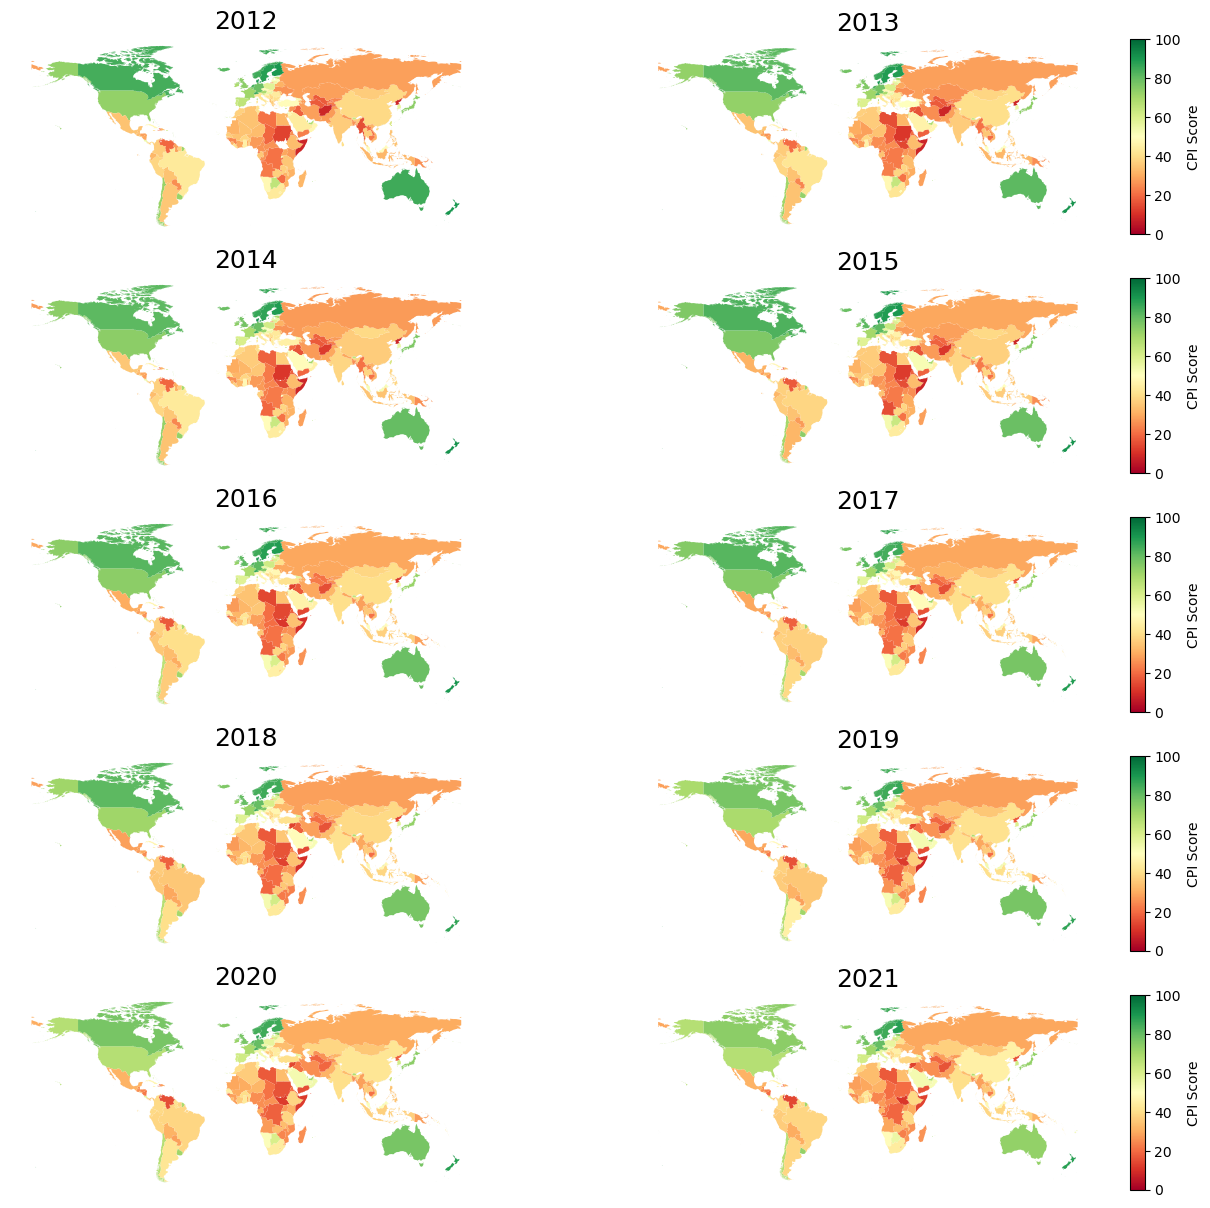

In [86]:
fig, map_axes = plt.subplots(5,2, figsize=(15,15))

from mpl_toolkits.axes_grid1 import make_axes_locatable

year = 2012

for ax_tuple in map_axes:
    for ax in ax_tuple: 
        if year % 2 != 0:
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="3%", pad=0.1)
            ax.set_axis_off()
            ax.set_title(year,fontsize=18)
            map_cpi.plot(column='CPI score {}'.format(year), 
                         ax=ax,  
                         legend=True, 
                         legend_kwds={'label': "CPI Score"}, 
                         cax=cax,
                         cmap='RdYlGn',
                         vmin=0,
                         vmax=100
                        );

        else:
            ax.set_axis_off()
            ax.set_title(year,fontsize=18)
            map_cpi.plot(column='CPI score {}'.format(year), 
                         ax=ax,
                         cmap='RdYlGn',
                         vmin=0,
                         vmax=100
                        );
        # plot Taiwan after the main map, so it can overlap China
        taiwan_map_cpi.plot(
                            column='CPI score {}'.format(year), 
                            ax=ax, 
                            cmap='RdYlGn',
                            vmin=0,
                            vmax=100
                            )
        year+=1
        

## Worldwide CPI Score From 2012 to 2021

![CPI Score From 2012 to 2021](pictures/cpi_changes_smooth.gif "CPI Score From 2012 to 2021")

GIF created with [EZGif](https://ezgif.com/maker)

In [87]:
cpi_cols = [col_name for col_name in col_names if 'CPI' in col_name]

score_means = CPI.describe()[cpi_cols].loc['mean',:]
score_means = score_means.rename(lambda x: int(x.replace("CPI score", "")))
score_means

2021    43.266667
2020    43.344444
2019    43.166667
2018    43.116667
2017    43.072222
2016    42.948864
2015    42.595238
2014    43.268571
2013    42.655367
2012    43.267045
Name: mean, dtype: float64

In [88]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

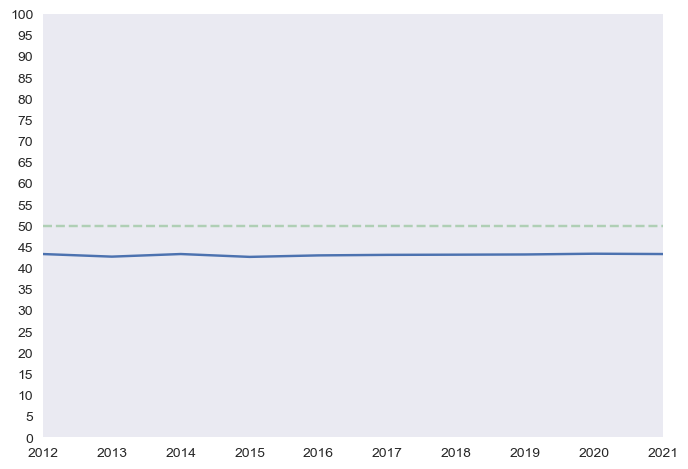

In [89]:
plt.style.use('seaborn-v0_8')
plt.plot(score_means)
plt.xlim(2012,2021)
plt.ylim(0,100)
plt.yticks(range(0,101,5))
# Transparency International's average worldwide CPI score goal
plt.axhline(50, color='green', alpha=0.25, linestyle='--')

plt.grid(False)

plt.show()

(2012.0, 2021.0)

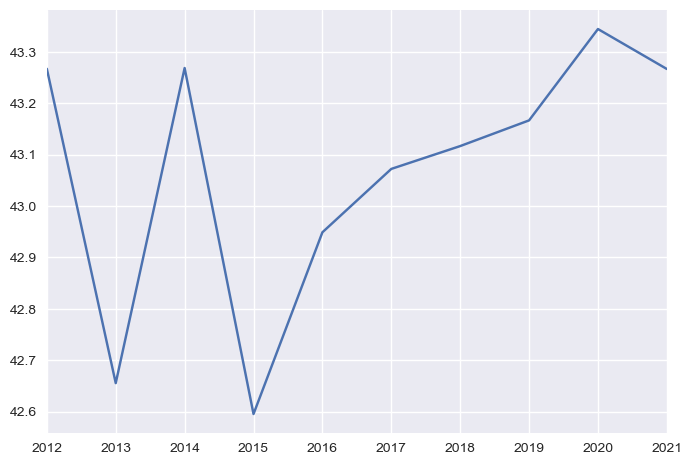

In [90]:
plt.plot(score_means)
plt.xlim(2012,2021)

In [91]:
# Calculate percentage of countries that's above 50
abv_50_pct = {}
abv_50_num = {}

year = 2021
for col in cpi_cols:
#     print(col)
    num_countries = CPI[col].notna().sum()
    num_countries_abv50 = (CPI[col] >= 50).sum()
    abv_50_pct[year] = num_countries_abv50 / num_countries * 100
    abv_50_num[year] = num_countries_abv50
    year -= 1
abv_50_pct
abv_50_num
#     print(CPI[col].notna().sum())
#     abv_50_pct[2012] = CPI[col].sum() / len()

{2021: 57,
 2020: 59,
 2019: 59,
 2018: 57,
 2017: 56,
 2016: 54,
 2015: 54,
 2014: 54,
 2013: 54,
 2012: 53}

(2012.0, 2021.0)

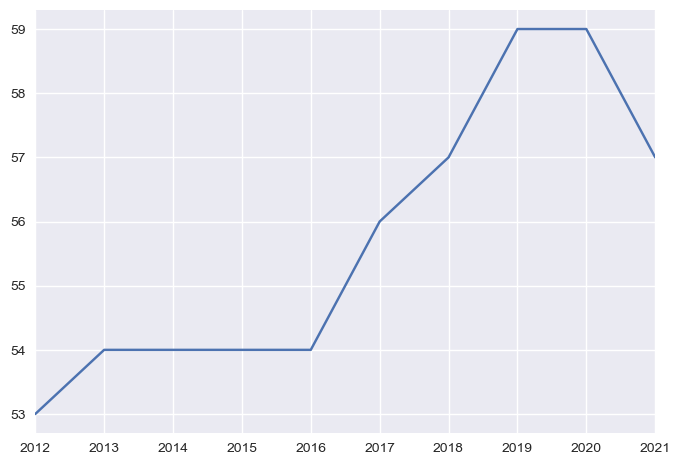

In [92]:
# Number of countries above 50
# ugly x and y
plt.plot(list(abv_50_num.keys()), list(abv_50_num.values()))
plt.yticks(range(53,60,1))
plt.xticks(range(2012,2022))
plt.xlim((2012,2021))

(2012.0, 2021.0)

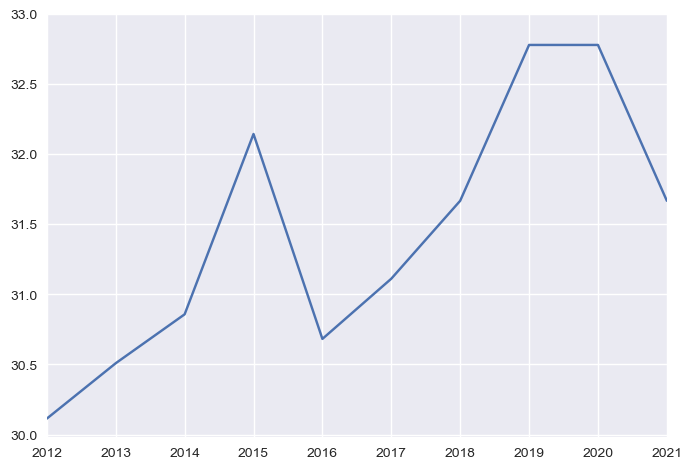

In [93]:
import numpy as np
# Let's look at the percentages with CPI score above 50 across the years
plt.plot(list(abv_50_pct.keys()), list(abv_50_pct.values()))
plt.yticks(np.arange(30,33.5,0.5))
plt.xticks(range(2012,2022))
plt.xlim((2012,2021))

In [94]:
# create below 50
# create a function for this
# Calculate percentage of countries that's below 50
bel_50_pct = {}
bel_50_num = {}

year = 2021
for col in cpi_cols:
#     print(col)
    num_countries = CPI[col].notna().sum()
    num_countries_bel50 = (CPI[col] < 50).sum()
    bel_50_pct[year] = num_countries_bel50 / num_countries * 100
    bel_50_num[year] = num_countries_bel50
    year -= 1
bel_50_pct
bel_50_num

{2021: 123,
 2020: 121,
 2019: 121,
 2018: 123,
 2017: 124,
 2016: 122,
 2015: 114,
 2014: 121,
 2013: 123,
 2012: 123}

(2012.0, 2021.0)

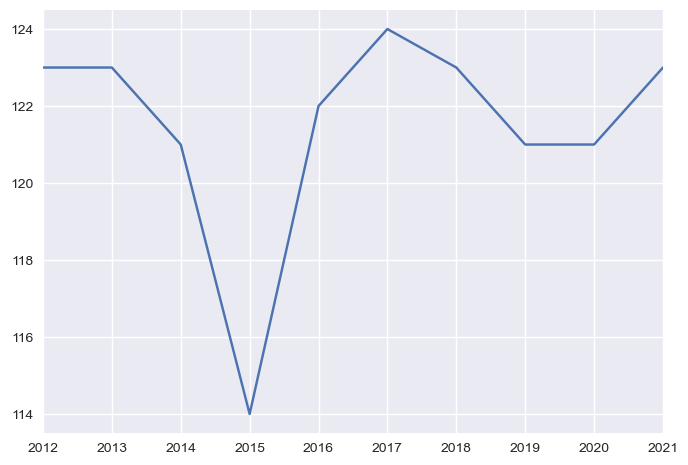

In [95]:
# Number of countries above 50
# ugly x and y
plt.plot(list(bel_50_num.keys()), list(bel_50_num.values()))
# plt.yticks(range(114,124,1))
plt.xticks(range(2012,2022))
plt.xlim((2012,2021))

(2012.0, 2021.0)

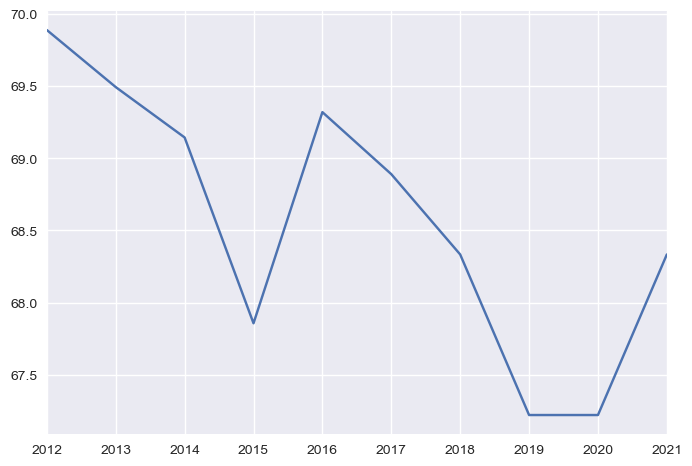

In [96]:
import numpy as np
# Let's look at the percentages with CPI score above 50 across the years
plt.plot(list(bel_50_pct.keys()), list(bel_50_pct.values()))
# plt.yticks(np.arange(30,33.5,0.5))
plt.xticks(range(2012,2022))
plt.xlim((2012,2021))

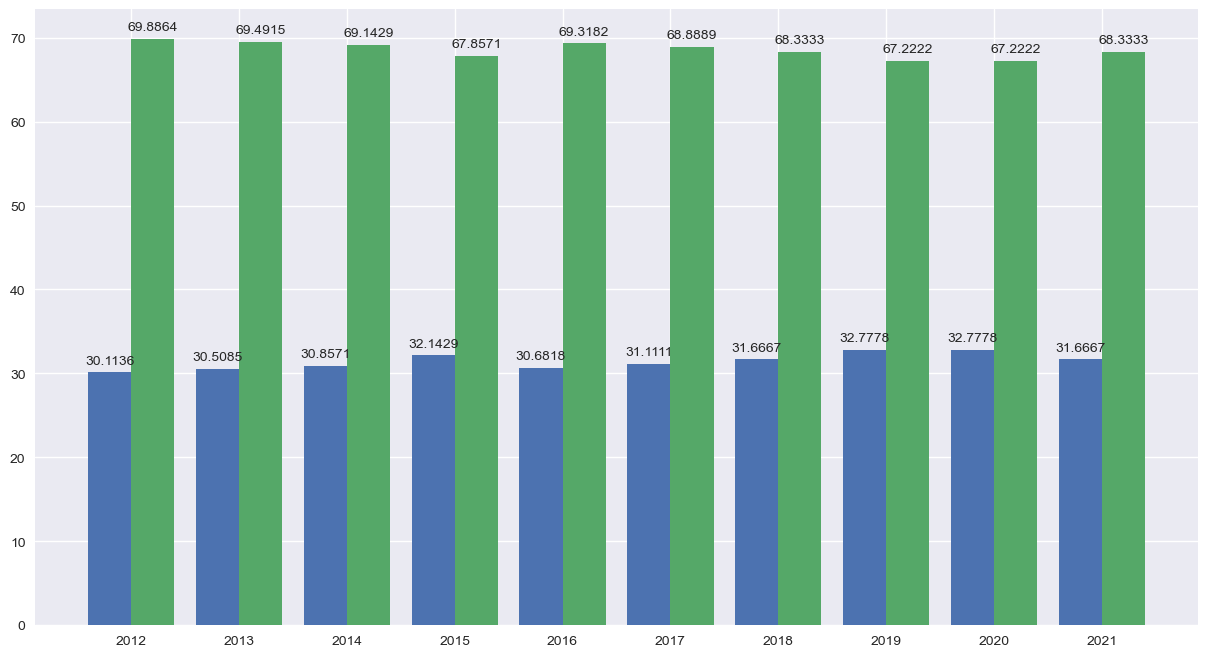

In [97]:
fig, ax = plt.subplots(figsize=(15,8))

x = np.arange(10)  # the label locations
width = 0.4  # the width of the bars

rev_abv_50_pct = list(reversed(list(abv_50_pct.values())))
rev_bel_50_pct = list(reversed(list(bel_50_pct.values())))

rects1 = ax.bar(x - width/2,  rev_abv_50_pct, width,  label='Men')
rects2 = ax.bar(x + width/2,  rev_bel_50_pct, width,  label='Women')

ax.bar_label(rects1, padding=4)
ax.bar_label(rects2, padding=4)
ax.set_xticks(x, list(range(2012,2022)))

plt.show()

### Region CPI score

In [98]:
cpi_region_means = CPI.groupby("Region").mean(numeric_only=True)[cpi_cols]

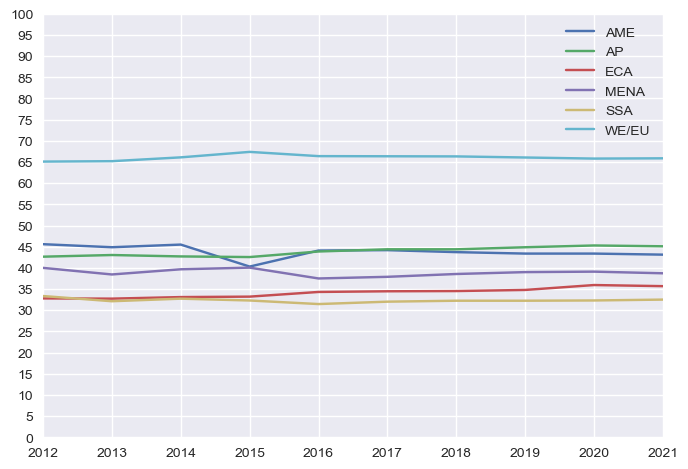

In [99]:
# AME   - The Americas
# AP    - Asia Pacific
# ECA   - Eastern Europe & Central Asia
# MENA  - Middle East & North Africa
# SSA   - Sub-Saharan Africa
# WE/EU - Western Europe

year_list = list(range(2012,2022))

for region in cpi_region_means.iterrows():
    reversed_cpi = list(reversed(region[1]))
    plt.plot(year_list, reversed_cpi, label=region[0])
    
plt.xlim(2012, 2021)
plt.ylim(0, 100)
plt.yticks(range(0,101,5))
plt.legend(loc='upper right')

In [100]:
# Compare with main CPI dataframe
# print(map_cpi.groupby("Region").mean(numeric_only=True))
# print(CPI.groupby("Region").mean(numeric_only=True))
print(map_cpi.groupby("Region").size())
print(CPI.groupby("Region").size())

# It seems that the Netherlands has multiple polygons and all of them are not duplicates
# map_cpi[map_cpi["Region"] == "WE/EU"].duplicated(subset="geometry")
# map_cpi[map_cpi["Region"] == "WE/EU"].duplicated()

map_cpi[map_cpi["ISO3"] == "CIV"]
CPI[CPI["ISO3"] == "CIV"]

Region
AME      33
AP       32
ECA      19
MENA     18
SSA      49
WE/EU    34
dtype: int64
Region
AME      33
AP       32
ECA      19
MENA     18
SSA      49
WE/EU    31
dtype: int64


,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
104,Cote d'Ivoire,CIV,SSA,36.0,105.0,36.0,104.0,35.0,106.0,35.0,105.0,36.0,103.0,34.0,108.0,106.0,32.0,115.0,32.0,136.0,27.0,130.0,29.0


In [101]:
map_cpi[map_cpi.duplicated(subset="ISO3") & ~map_cpi["ISO3"].isna()]

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
237,235.0,236.0,Admin-0 country,2.0,Country,Kingdom of the Netherlands,,17084719.0,14.0,870800.0,2017.0,2011.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,,BES,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Sint Eustatius (Neth.),Name in italic,Other,0.178178,0.001619,"POLYGON ((-62.99714 17.52562, -62.99470 17.492...",Netherlands,NLD,WE/EU,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,83.0,8.0,9.0,84.0,8.0,83.0,8.0,83.0,9.0,84.0
238,236.0,237.0,Admin-0 country,2.0,Country,Kingdom of the Netherlands,,17084719.0,14.0,870800.0,2017.0,2011.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,,BES,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Saba (Neth.),Name in italic,Other,0.090968,0.000601,"POLYGON ((-63.23843 17.64692, -63.24893 17.640...",Netherlands,NLD,WE/EU,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,83.0,8.0,9.0,84.0,8.0,83.0,8.0,83.0,9.0,84.0
239,237.0,238.0,Admin-0 country,2.0,Country,Kingdom of the Netherlands,,17084719.0,14.0,870800.0,2017.0,2011.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,NL,NLD,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Netherlands,None,Other,22.816386,4.884540,"MULTIPOLYGON (((3.73422 51.35578, 3.70216 51.3...",Netherlands,NLD,WE/EU,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,83.0,8.0,9.0,84.0,8.0,83.0,8.0,83.0,9.0,84.0
250,250.0,251.0,Admin-0 country,2.0,Country,New Zealand,,4510327.0,12.0,174800.0,2017.0,2006.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NZ,NZ,NZL,NZL,554,554,NZ,NZL,Oceania,Oceania,Australia and New Zealand,East Asia & Pacific,نيوزيلندا,নিউজিল্যান্ড,Neuseeland,New Zealand,Nueva Zelanda,Nouvelle-Zélande,Νέα Ζηλανδία,न्यूज़ीलैण्ड,Új-Zéland,Selandia Baru,Nuova Zelanda,ニュージーランド,뉴질랜드,Nieuw-Zeeland,Nowa Zelandia,Nova Zelândia,Новая Зеландия,Nya Zeeland,Yeni Zelanda,New Zealand,新西兰,New Zealand,None,Other,104.828986,29.143542,"MULTIPOLYGON (((169.21276 -52.47456, 169.20502...",New Zealand,NZL,AP,88.0,1.0,88.0,1.0,87.0,1.0,87.0,2.0,89.0,1.0,90.0,1.0,1.0,91.0,2.0,91.0,1.0,91.0,1.0,90.0


In [102]:
# map_cpi[map_cpi["N"] == "WE/EU"]
map_cpi["FORMAL_EN"].value_counts()

                              22
Kingdom of the Netherlands     4
New Zealand                    2
Arab Republic of Egypt         1
Burkina Faso                   1
                              ..
Republic of Sierra Leone       1
Republic of Guinea             1
Republic of Liberia            1
Central African Republic       1
Republic of El Salvador        1
Name: FORMAL_EN, Length: 226, dtype: int64

In [103]:
# The size of WE/EU in map_cpi is bigger than the size of WE/EU in map_cpi because the Netherlands has 3 extra geometries
map_cpi[map_cpi["NAME_EN"] == "Netherlands"]

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
236,234.0,235.0,Admin-0 country,2.0,Country,Kingdom of the Netherlands,,17084719.0,14.0,870800.0,2017.0,2011.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,,BES,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Bonaire (Neth.),Name in italic,Other,0.870961,0.022355,"POLYGON ((-68.21154 12.22809, -68.22053 12.231...",Netherlands,NLD,WE/EU,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,83.0,8.0,9.0,84.0,8.0,83.0,8.0,83.0,9.0,84.0
237,235.0,236.0,Admin-0 country,2.0,Country,Kingdom of the Netherlands,,17084719.0,14.0,870800.0,2017.0,2011.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,,BES,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Sint Eustatius (Neth.),Name in italic,Other,0.178178,0.001619,"POLYGON ((-62.99714 17.52562, -62.99470 17.492...",Netherlands,NLD,WE/EU,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,83.0,8.0,9.0,84.0,8.0,83.0,8.0,83.0,9.0,84.0
238,236.0,237.0,Admin-0 country,2.0,Country,Kingdom of the Netherlands,,17084719.0,14.0,870800.0,2017.0,2011.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,,BES,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Saba (Neth.),Name in italic,Other,0.090968,0.000601,"POLYGON ((-63.23843 17.64692, -63.24893 17.640...",Netherlands,NLD,WE/EU,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,83.0,8.0,9.0,84.0,8.0,83.0,8.0,83.0,9.0,84.0
239,237.0,238.0,Admin-0 country,2.0,Country,Kingdom of the Netherlands,,17084719.0,14.0,870800.0,2017.0,2011.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NL,NL,NLD,NLD,528,528,NL,NLD,Europe,Europe,Western Europe,Europe & Central Asia,هولندا,নেদারল্যান্ডস,Niederlande,Netherlands,Países Bajos,Pays-Bas,Ολλανδία,नीदरलैण्ड,Hollandia,Belanda,Paesi Bassi,オランダ,네덜란드,Nederland,Holandia,Países Baixos,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,Netherlands,None,Other,22.816386,4.884540,"MULTIPOLYGON (((3.73422 51.35578, 3.70216 51.3...",Netherlands,NLD,WE/EU,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,82.0,8.0,83.0,8.0,9.0,84.0,8.0,83.0,8.0,83.0,9.0,84.0


In [104]:
# New Zealand has two geometries yet the size of AP is still the same; it's because Taiwan is not in map_cpi thus balancing out the extra country
map_cpi[map_cpi["NAME_EN"] == "New Zealand"]

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
249,249.0,250.0,Admin-0 country,2.0,Country,New Zealand,,4510327.0,12.0,174800.0,2017.0,2006.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NZ,NZ,NZL,NZL,554,554,,TKL,Oceania,Oceania,Australia and New Zealand,East Asia & Pacific,نيوزيلندا,নিউজিল্যান্ড,Neuseeland,New Zealand,Nueva Zelanda,Nouvelle-Zélande,Νέα Ζηλανδία,न्यूज़ीलैण्ड,Új-Zéland,Selandia Baru,Nuova Zelanda,ニュージーランド,뉴질랜드,Nieuw-Zeeland,Nowa Zelandia,Nova Zelândia,Новая Зеландия,Nya Zeeland,Yeni Zelanda,New Zealand,新西兰,Tokelau (NZ),Name in italic,Other,0.178453,0.000348,"MULTIPOLYGON (((-171.18566 -9.36126, -171.1873...",New Zealand,NZL,AP,88.0,1.0,88.0,1.0,87.0,1.0,87.0,2.0,89.0,1.0,90.0,1.0,1.0,91.0,2.0,91.0,1.0,91.0,1.0,90.0
250,250.0,251.0,Admin-0 country,2.0,Country,New Zealand,,4510327.0,12.0,174800.0,2017.0,2006.0,2016.0,2. Developed region: nonG7,1. High income: OECD,NZ,NZ,NZL,NZL,554,554,NZ,NZL,Oceania,Oceania,Australia and New Zealand,East Asia & Pacific,نيوزيلندا,নিউজিল্যান্ড,Neuseeland,New Zealand,Nueva Zelanda,Nouvelle-Zélande,Νέα Ζηλανδία,न्यूज़ीलैण्ड,Új-Zéland,Selandia Baru,Nuova Zelanda,ニュージーランド,뉴질랜드,Nieuw-Zeeland,Nowa Zelandia,Nova Zelândia,Новая Зеландия,Nya Zeeland,Yeni Zelanda,New Zealand,新西兰,New Zealand,None,Other,104.828986,29.143542,"MULTIPOLYGON (((169.21276 -52.47456, 169.20502...",New Zealand,NZL,AP,88.0,1.0,88.0,1.0,87.0,1.0,87.0,2.0,89.0,1.0,90.0,1.0,1.0,91.0,2.0,91.0,1.0,91.0,1.0,90.0


In [105]:
CPI[CPI["Region"] == "AP"]["Country"].value_counts().sort_index()

Afghanistan          1
Australia            1
Bangladesh           1
Bhutan               1
Brunei Darussalam    1
Cambodia             1
China                1
Fiji                 1
Hong Kong            1
India                1
Indonesia            1
Japan                1
Korea, North         1
Korea, South         1
Laos                 1
Malaysia             1
Maldives             1
Mongolia             1
Myanmar              1
Nepal                1
New Zealand          1
Pakistan             1
Papua New Guinea     1
Philippines          1
Singapore            1
Solomon Islands      1
Sri Lanka            1
Taiwan               1
Thailand             1
Timor-Leste          1
Vanuatu              1
Vietnam              1
Name: Country, dtype: int64

In [106]:
map_cpi[map_cpi["Region"] == "AP"]["Country"].value_counts().sort_index()
# map_cpi[map_cpi["Region"] == "AP"]

Afghanistan          1
Australia            1
Bangladesh           1
Bhutan               1
Brunei Darussalam    1
Cambodia             1
China                1
Fiji                 1
Hong Kong            1
India                1
Indonesia            1
Japan                1
Korea, North         1
Korea, South         1
Laos                 1
Malaysia             1
Maldives             1
Mongolia             1
Myanmar              1
Nepal                1
New Zealand          2
Pakistan             1
Papua New Guinea     1
Philippines          1
Singapore            1
Solomon Islands      1
Sri Lanka            1
Thailand             1
Timor-Leste          1
Vanuatu              1
Vietnam              1
Name: Country, dtype: int64

In [107]:
CPI[CPI["Region"] == "WE/EU"]["Country"].value_counts().sort_index()

Austria           1
Belgium           1
Bulgaria          1
Croatia           1
Cyprus            1
Czechia           1
Denmark           1
Estonia           1
Finland           1
France            1
Germany           1
Greece            1
Hungary           1
Iceland           1
Ireland           1
Italy             1
Latvia            1
Lithuania         1
Luxembourg        1
Malta             1
Netherlands       1
Norway            1
Poland            1
Portugal          1
Romania           1
Slovakia          1
Slovenia          1
Spain             1
Sweden            1
Switzerland       1
United Kingdom    1
Name: Country, dtype: int64

In [108]:
map_cpi[map_cpi["Region"] == "WE/EU"]["Country"].value_counts().sort_index()

Austria           1
Belgium           1
Bulgaria          1
Croatia           1
Cyprus            1
Czechia           1
Denmark           1
Estonia           1
Finland           1
Germany           1
Greece            1
Hungary           1
Iceland           1
Ireland           1
Italy             1
Latvia            1
Lithuania         1
Luxembourg        1
Malta             1
Netherlands       4
Poland            1
Portugal          1
Romania           1
Slovakia          1
Slovenia          1
Spain             1
Sweden            1
Switzerland       1
United Kingdom    1
Name: Country, dtype: int64

In [109]:
region_cpi = CPI.groupby("Region").mean(numeric_only=True)[cpi_cols]
region_cpi = region_cpi.rename(lambda x: int(x.replace("CPI score", "")), axis=1)

AME
AP
ECA
MENA
SSA
WE/EU


Index(['AME', 'AP', 'ECA', 'MENA', 'SSA', 'WE/EU'], dtype='object', name='Region')

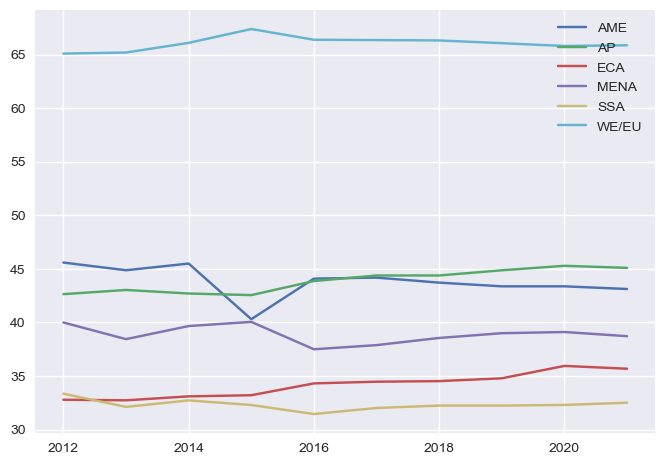

In [110]:
# plt.plot(region_cpi)
# plt.plot(region_cpi["AME"])
# plt.plot(region_cpi.loc["AME"].sort_index())
for region in region_cpi.index:
    print(region)
    plt.plot(region_cpi.loc[region], label=region)
    #     print(region)
#     print(data)
#     plt.plot(region)
# plt.plot(.loc["AME"])
# year
plt.legend()

region_cpi.index

In [111]:
region_cpi

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
Region,,,,,,,,,,
AME,43.125000,43.375000,43.375000,43.718750,44.187500,44.093750,40.307692,45.500000,44.875000,45.593750
AP,45.096774,45.290323,44.870968,44.387097,44.387097,43.866667,42.555556,42.703704,43.035714,42.642857
ECA,35.684211,35.947368,34.789474,34.526316,34.473684,34.315789,33.210526,33.105263,32.736842,32.789474
MENA,38.722222,39.111111,39.000000,38.555556,37.888889,37.500000,40.055556,39.666667,38.444444,40.000000
SSA,32.510204,32.306122,32.244898,32.244898,32.020408,31.456522,32.297872,32.729167,32.122449,33.354167
WE/EU,65.870968,65.806452,66.064516,66.322581,66.354839,66.387097,67.387097,66.096774,65.193548,65.096774


/var/folders/0s/88sw5bwj56v6qymnqpqx8sjm0000gn/T/ipykernel_40512/3441760301.py:71: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlGn')


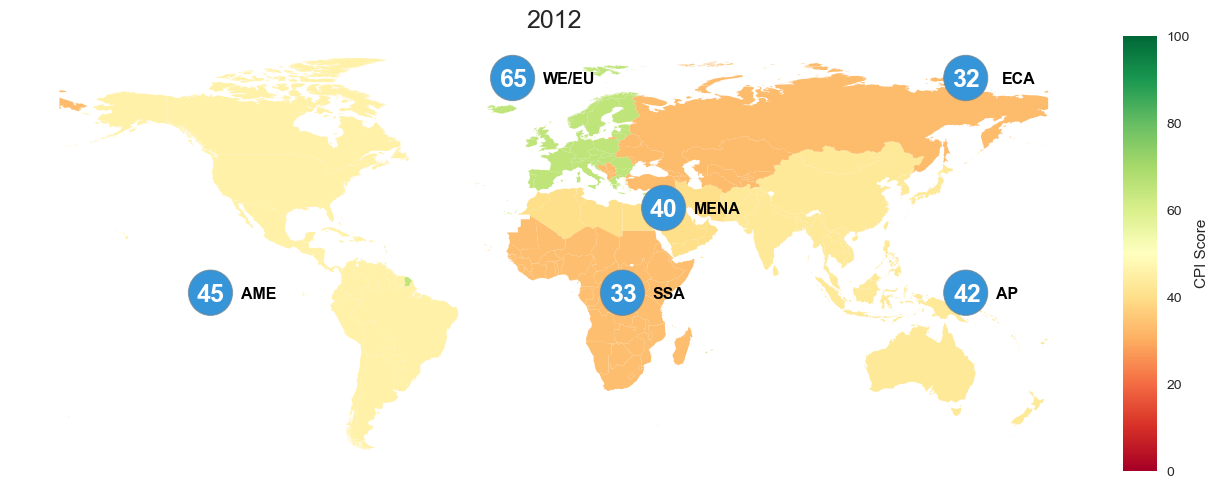

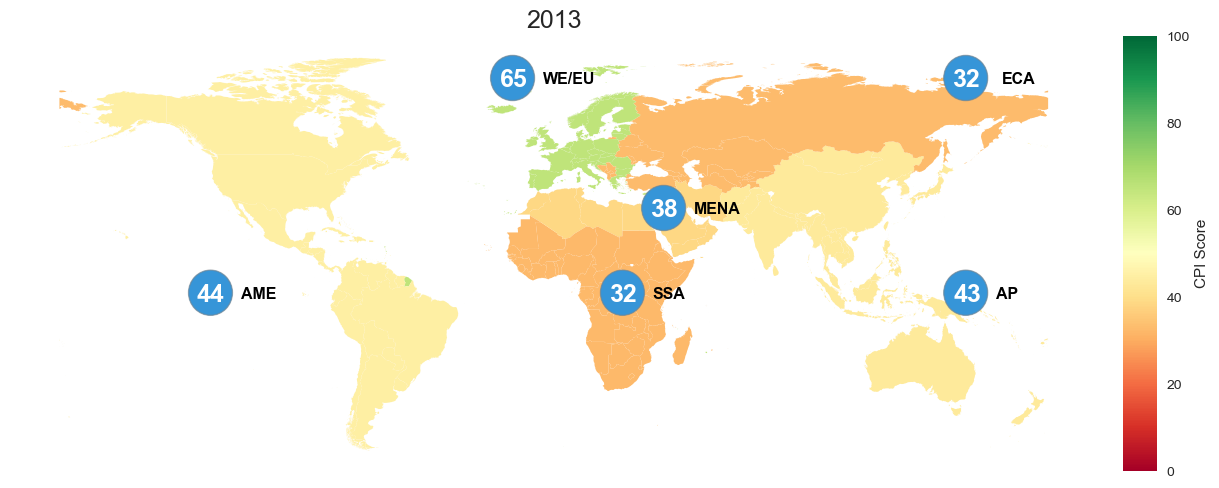

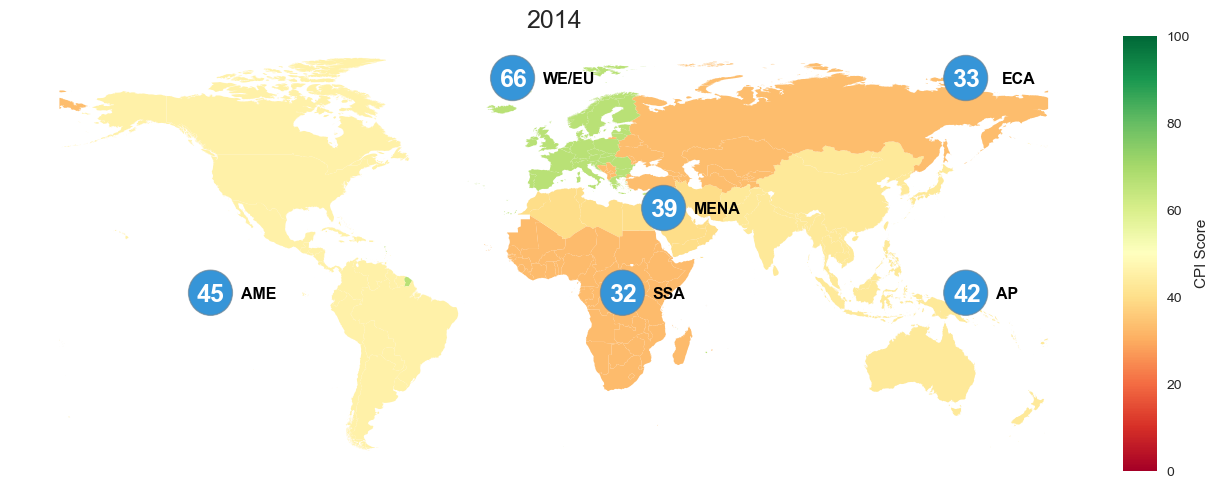

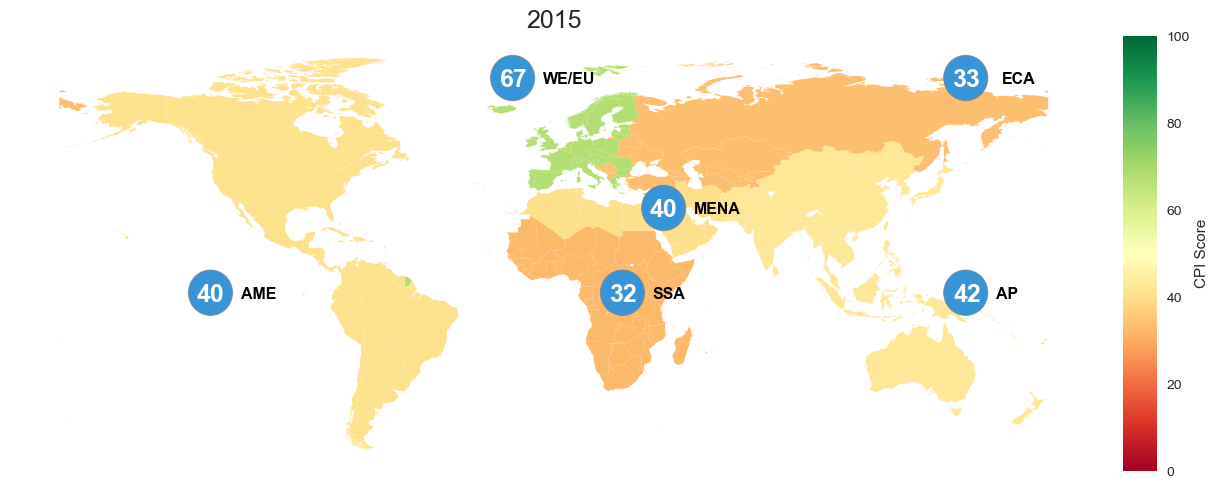

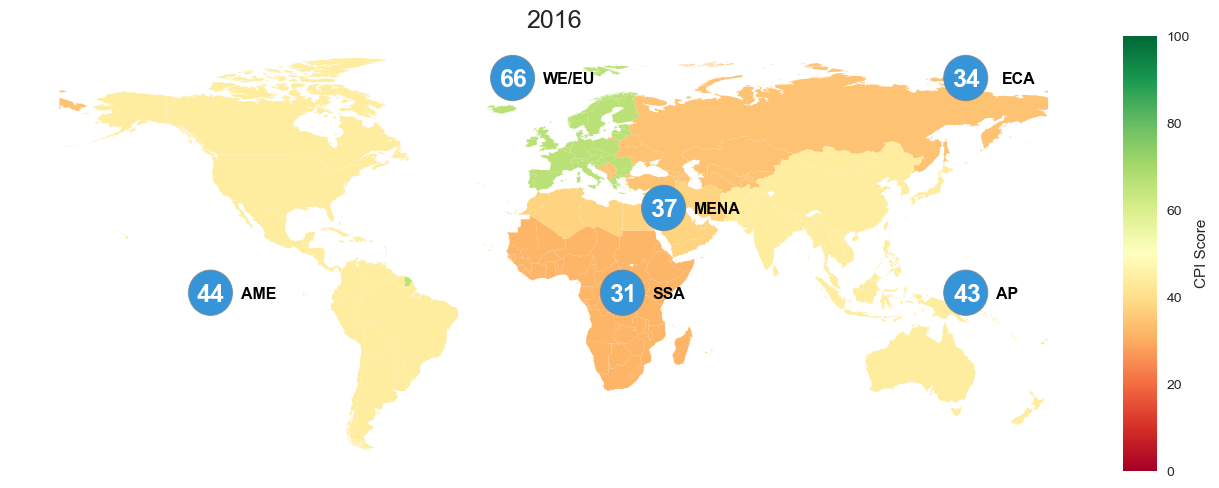

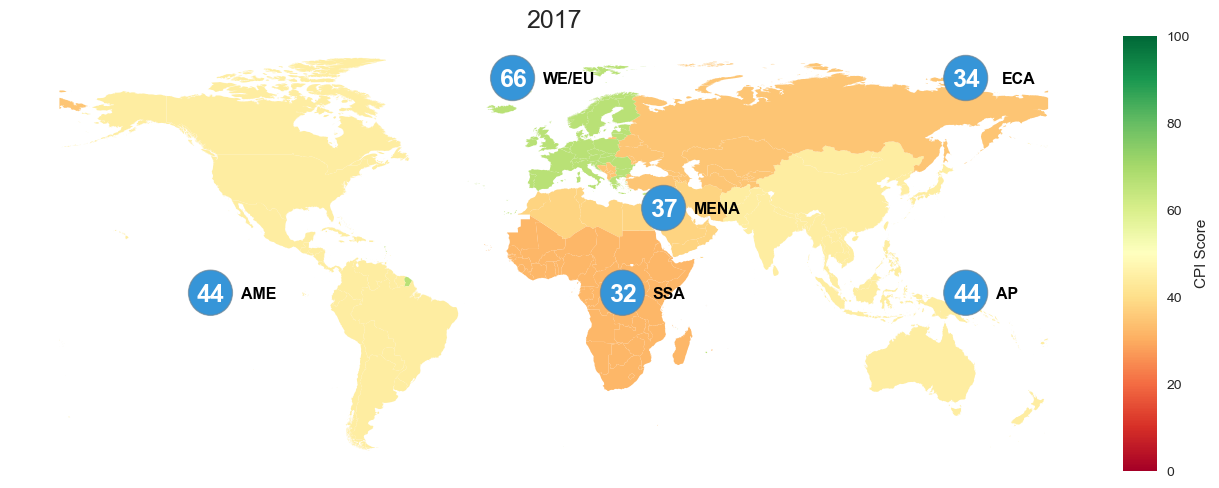

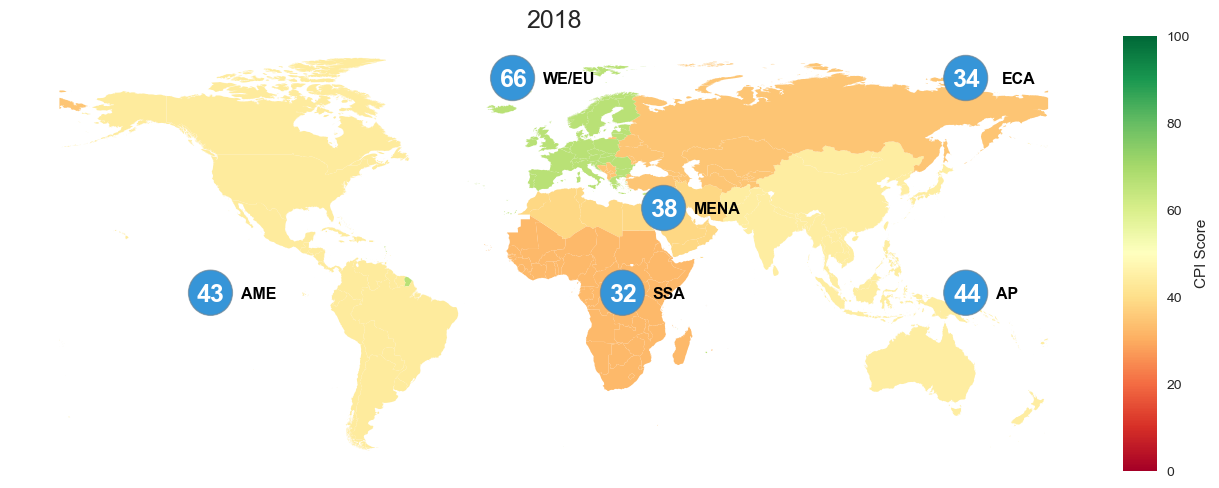

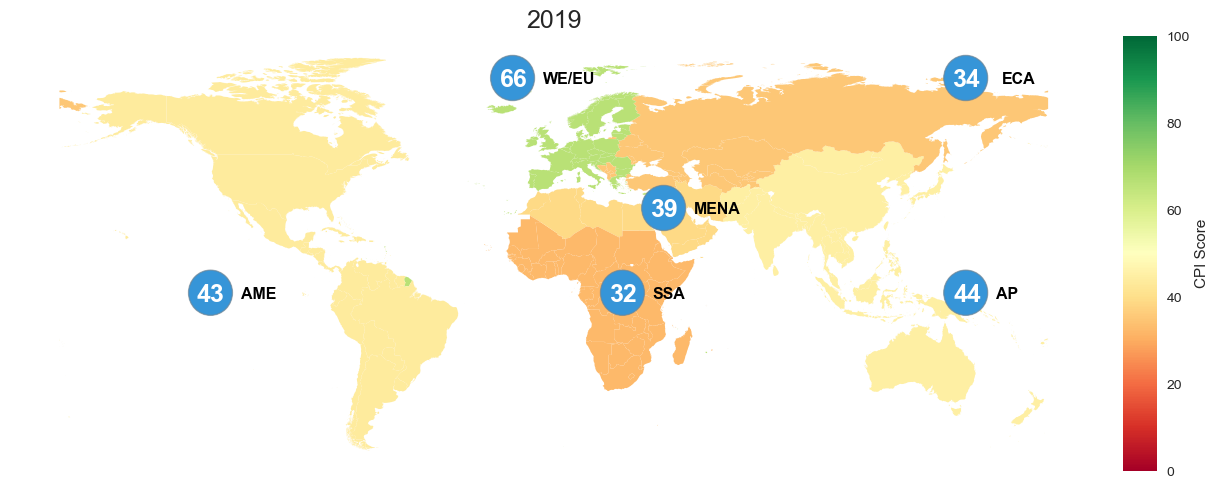

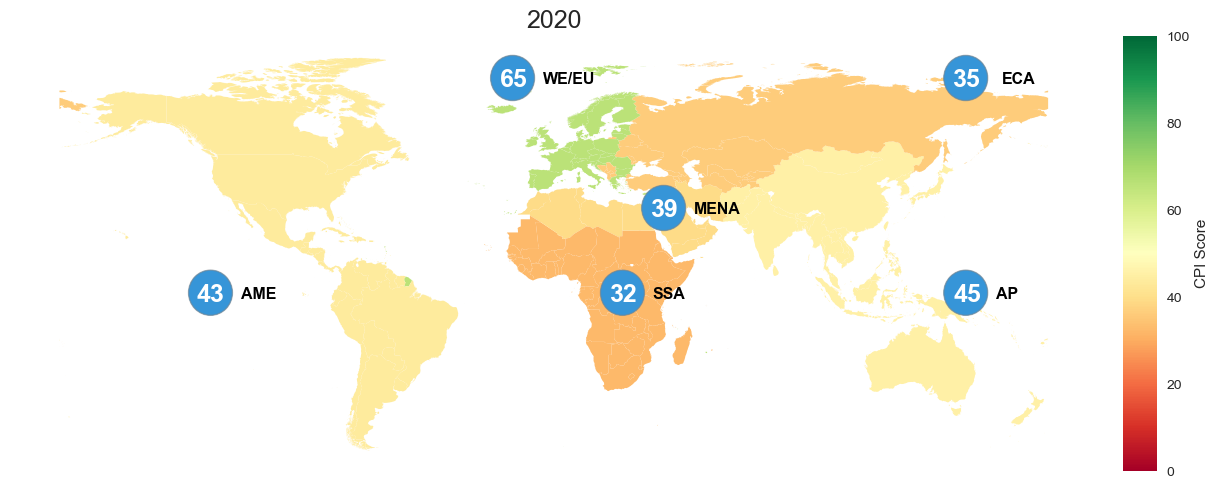

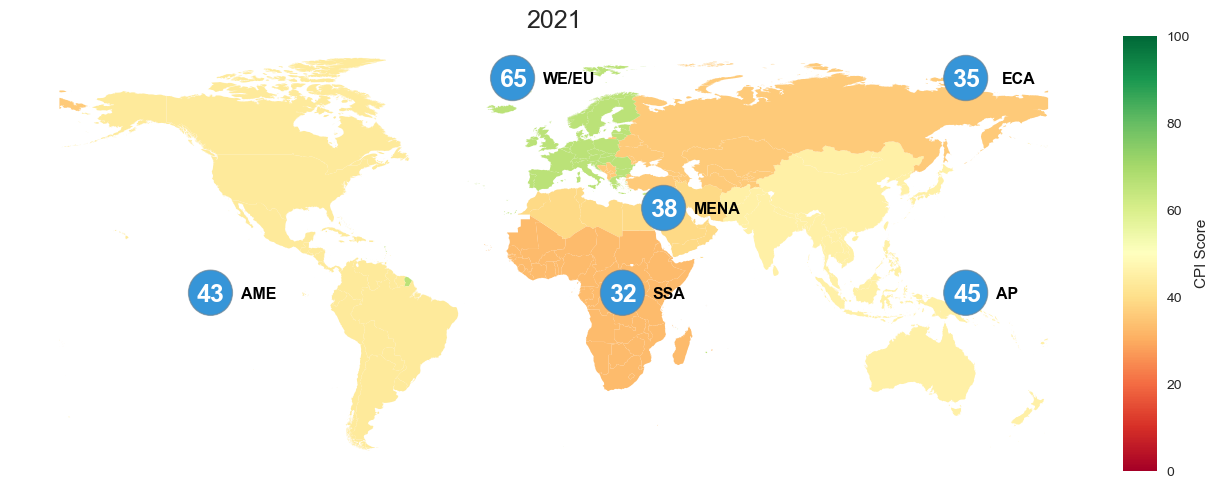

In [112]:
# map_cpi["Region"].dropna().unique()
# map_cpi[map_cpi["Region"] == "AP"].plot()


map_cpi_filled_region = map_cpi.dropna(subset="Region")

def get_region_mean(row, region_means):
    row_region = row["Region"]
    for year in range(2012,2022):
        region_mean = region_means.loc[row_region]["CPI score {}".format(year)]
        col_name = "region_mean_{}".format(year)
        row[col_name] = region_mean
    return row

test=map_cpi_filled_region.copy()

test_2 = map_cpi_filled_region.apply(lambda row: get_region_mean(row, cpi_region_means), axis=1)
# test_2.iloc[:,-10:-1]

# ap_region = test_2[test_2["Region"] == "AP"]

# fig, ax = plt.subplots(1,1)


# print(norm(ap_region.iloc[0]["region_mean_2012"]))
# print(color)
# # ax.set_axis_off()
# ap_region.plot( 
# #                 column='region_mean_2012', 
#                 ax=ax,
#                 legend=True, 
#                 legend_kwds={'label': "CPI Score"},
#                 color = color,
# #                 cmap='RdYlGn',
# #                 vmin=0,
# #                 vmax=100
# )

# ax.set_title(year,fontsize=18)
# plt.xlim(50, 200)
# plt.show()

# test_2.plot( column='region_mean_2012', 
#                 ax=ax,
#                 legend=True, 
#                 legend_kwds={'label': "CPI Score"},
# #                 color = color,
#                 cmap='RdYlGn',
#                 vmin=0,
#                 vmax=100
#            )
# for region, cpi_scores in cpi_region_means.iterrows():
#     fig, map_axes = plt.subplots(1,10)
#     for ax in map_axes:
        
# cpi_region_means
# 10 default
# fig, map_axes = plt.subplots(2,1, figsize=(30,50))


# from mpl_toolkits.axes_grid1 import make_axes_locatable

year = 2012

years=list(range(2012,2022))

import math
from matplotlib import cm, colors
norm = colors.Normalize(vmin=0, vmax=100)

cmap = cm.get_cmap('RdYlGn')


for year in years:
    fig, ax = plt.subplots(1,1, figsize=(15,15))
    ax.set_axis_off()
    # TODO: Make a function for the following later
    # circle for WE/EU
    we_mean = math.floor(region_cpi.loc["WE/EU"][year])
    color = cmap(norm(we_mean))
    we_circle = plt.Circle((-15,76), 8, color="#3695d8")
    we_circle_border = plt.Circle((-15,76), 8, color="gray", alpha=0.5, fill=False, linewidth=1)
    # x axis + 11, y axis - 2 from main circle coordinate
    ax.text(-4, 74, "WE/EU", color='black', fontsize=11.5, fontweight='bold')
    # x axis - 4.2, y axis - 3 from main circle coordinate
    ax.text(-19.5,73, we_mean, fontsize=18, color='white', fontweight='bold')
    ax.add_patch(we_circle)
    ax.add_patch(we_circle_border)
    
   
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.1)
#     ax.add_patch(circle1)
#     ax.add_patch(circle_border)
#         ax.set_axis_off()
    ax.set_title(year,fontsize=18)
    test_2.plot(column='region_mean_{}'.format(year), 
                     ax=ax,  
                     legend=True, 
                     legend_kwds={'label': "CPI Score"}, 
                     cax=cax,
                     cmap='RdYlGn',
                     vmin=0,
                     vmax=100
                    );

        
     # circle for AP
    ap_mean = math.floor(region_cpi.loc["AP"][year])
    ap_circle = plt.Circle((150,0), 8, color="#3695d8")
    ap_circle_border = plt.Circle((150,0), 8, color="gray", alpha=0.5, fill=False, linewidth=1)
    # x axis + 13, y axis - 2
    ax.text(161, -2, "AP", color='black', fontsize=11.5, fontweight='bold')
    # x axis - 4.2, y axis - 3
    ax.text(145.5,-3, ap_mean, fontsize=18, color='white', fontweight='bold')
    ax.add_patch(ap_circle)
    ax.add_patch(ap_circle_border)
    
    # circle for ECA aka Eastern Europe and Central Asia
    eca_mean = math.floor(region_cpi.loc["ECA"][year])
    circle_x = 150
    circle_y = 76
    circle_coord = (circle_x, circle_y)
    eca_circle = plt.Circle(circle_coord, 8, color="#3695d8")
    eca_circle_border = plt.Circle(circle_coord, 8, color="gray", alpha=0.5, fill=False, linewidth=1)
    # x axis + 13, y axis - 2
    ax.text(circle_coord[0]+13, circle_coord[1]-2, "ECA", color='black', fontsize=11.5, fontweight='bold')
    # x axis - 4.2, y axis - 3
    ax.text(circle_coord[0]-5,circle_coord[1]-3, eca_mean, fontsize=18, color='white', fontweight='bold')
    
    ax.add_patch(eca_circle)
    ax.add_patch(eca_circle_border)
    
     # circle for MENA aka Middle East and North Africa
    mena_mean = math.floor(region_cpi.loc["MENA"][year])
    circle_x = 40
    circle_y = 30
    circle_coord = (circle_x, circle_y)
    mena_circle = plt.Circle(circle_coord, 8, color="#3695d8")
    mena_circle_border = plt.Circle(circle_coord, 8, color="gray", alpha=0.5, fill=False, linewidth=1)
    # x axis + 13, y axis - 2
    ax.text(circle_coord[0]+11, circle_coord[1]-2, "MENA", color='black', fontsize=11.5, fontweight='bold')
    # x axis - 4.2, y axis - 3
    ax.text(circle_coord[0]-5,circle_coord[1]-3, mena_mean, fontsize=18, color='white', fontweight='bold')
    
    ax.add_patch(mena_circle)
    ax.add_patch(mena_circle_border)
    
     # circle for SSA or Sub-Saharan Africa
    ssa_mean = math.floor(region_cpi.loc["SSA"][year])
    circle_x = 25
    circle_y = 0
    circle_coord = (circle_x, circle_y)
    ssa_circle = plt.Circle(circle_coord, 8, color="#3695d8")
    ssa_circle_border = plt.Circle(circle_coord, 8, color="gray", alpha=0.5, fill=False, linewidth=1)
    # x axis + 13, y axis - 2
    ax.text(circle_coord[0]+11, circle_coord[1]-2, "SSA", color='black', fontsize=11.5, fontweight='bold')
    # x axis - 4.2, y axis - 3
    ax.text(circle_coord[0]-5,circle_coord[1]-3, ssa_mean, fontsize=18, color='white', fontweight='bold')
    
    ax.add_patch(ssa_circle)
    ax.add_patch(ssa_circle_border)
    
     # circle for AME or The Americas
    ame_mean = math.floor(region_cpi.loc["AME"][year])
    circle_x = -125
    circle_y = 0
    circle_coord = (circle_x, circle_y)
    ame_circle = plt.Circle(circle_coord, 8, color="#3695d8")
    ame_circle_border = plt.Circle(circle_coord, 8, color="gray", alpha=0.5, fill=False, linewidth=1)
    # x axis + 13, y axis - 2
    ax.text(circle_coord[0]+11, circle_coord[1]-2, "AME", color='black', fontsize=11.5, fontweight='bold')
    # x axis - 4.2, y axis - 3
    ax.text(circle_coord[0]-5,circle_coord[1]-3, ame_mean, fontsize=18, color='white', fontweight='bold')
    
    ax.add_patch(ame_circle)
    ax.add_patch(ame_circle_border)
    
    
    plt.savefig(f"pictures/regional_{year}", bbox_inches='tight')
    plt.show()
    year+=1
        
# test_2


![regional cpi changes](pictures/regional_cpi_changes_crossfade.gif "Regional CPI Changes 2012-2021")

### Compare 2012 to 2021 CPI score - which country changed and which didn't

In [113]:
# For those countries with CPI score in 2012 and 2021, how many of those countries have a different CPI score in 2021 than in 2012
CPI["changes_CPI_12to21"] = CPI["CPI score 2021"] - CPI["CPI score 2012"]

In [114]:
CPI[CPI["changes_CPI_12to21"] >= 1][["Country", "CPI score 2021", "CPI score 2012"]]

,Country,CPI score 2021,CPI score 2012
8,Luxembourg,81.0,80.0
9,Germany,80.0,79.0
10,United Kingdom,78.0,74.0
14,Ireland,74.0,69.0
15,Estonia,74.0,64.0
...,...,...,...
167,Sudan,20.0,13.0
170,Turkmenistan,19.0,17.0
173,Afghanistan,16.0,8.0
174,"Korea, North",16.0,8.0


In [115]:
# plot countries with at least one point improvement
cpi_change_threshold = 5
cpi_improvements = CPI[CPI["changes_CPI_12to21"] >= cpi_change_threshold][["Country", "CPI score 2021", "CPI score 2012", "changes_CPI_12to21"]]
cpi_declined     = CPI[CPI["changes_CPI_12to21"] <= -cpi_change_threshold][["Country", "CPI score 2021", "CPI score 2012", "changes_CPI_12to21"]]
cpi_stagnated         = CPI[CPI["changes_CPI_12to21"].between(-cpi_change_threshold,cpi_change_threshold)][["Country", "CPI score 2021", "CPI score 2012", "changes_CPI_12to21"]]
cpi_improvements

,Country,CPI score 2021,CPI score 2012,changes_CPI_12to21
14,Ireland,74.0,69.0,5.0
15,Estonia,74.0,64.0,10.0
16,Austria,74.0,69.0,5.0
22,Seychelles,70.0,52.0,18.0
24,Bhutan,68.0,63.0,5.0
25,Taiwan,68.0,61.0,7.0
31,"Korea, South",62.0,56.0,6.0
33,Lithuania,61.0,54.0,7.0
36,Latvia,59.0,49.0,10.0
41,Italy,56.0,42.0,14.0


In [116]:
cpi_declined

,Country,CPI score 2021,CPI score 2012,changes_CPI_12to21
12,Canada,74.0,84.0,-10.0
13,Iceland,74.0,82.0,-8.0
17,Australia,73.0,85.0,-12.0
26,Chile,67.0,72.0,-5.0
27,United States of America,67.0,73.0,-6.0
28,Barbados,65.0,76.0,-11.0
29,Bahamas,64.0,71.0,-7.0
30,Qatar,63.0,68.0,-5.0
43,Saint Lucia,56.0,71.0,-15.0
44,Botswana,55.0,65.0,-10.0


In [117]:
cpi_stagnated

,Country,CPI score 2021,CPI score 2012,changes_CPI_12to21
0,Denmark,88.0,90.0,-2.0
1,Finland,88.0,90.0,-2.0
2,New Zealand,88.0,90.0,-2.0
3,Norway,85.0,85.0,0.0
4,Singapore,85.0,87.0,-2.0
...,...,...,...,...
170,Turkmenistan,19.0,17.0,2.0
171,Equatorial Guinea,17.0,20.0,-3.0
172,Libya,17.0,21.0,-4.0
176,Venezuela,14.0,19.0,-5.0


<BarContainer object of 3 artists>

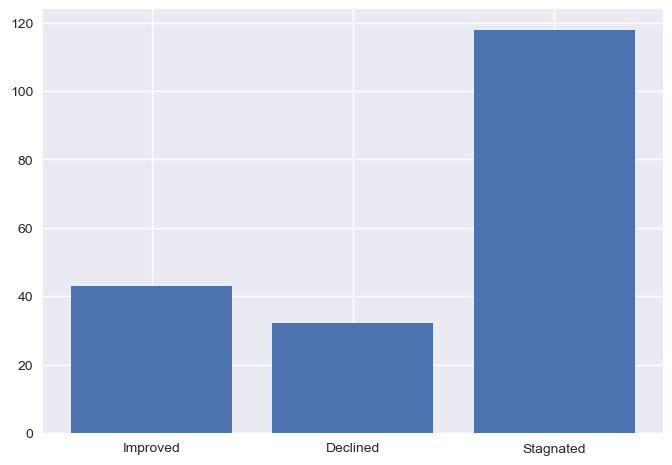

In [118]:
# plot improved, declined, and 0
sum_improved  = cpi_improvements.shape[0]
sum_declined  = cpi_declined.shape[0]
sum_stagnated = cpi_stagnated.shape[0]


plt.bar(["Improved", "Declined", "Stagnated"],[sum_improved, sum_declined, sum_stagnated])

In [119]:
# top 10 countries improved
cpi_improvements.sort_values("changes_CPI_12to21", ascending=False)[:10]

,Country,CPI score 2021,CPI score 2012,changes_CPI_12to21
22,Seychelles,70.0,52.0,18.0
57,Armenia,49.0,34.0,15.0
41,Italy,56.0,42.0,14.0
140,Myanmar,28.0,15.0,13.0
58,Greece,49.0,36.0,13.0
89,Guyana,39.0,28.0,11.0
142,Uzbekistan,28.0,17.0,11.0
82,Belarus,41.0,31.0,10.0
36,Latvia,59.0,49.0,10.0
15,Estonia,74.0,64.0,10.0


In [120]:
# top 10 countries declined
cpi_declined.sort_values("changes_CPI_12to21")[:10]

,Country,CPI score 2021,CPI score 2012,changes_CPI_12to21
43,Saint Lucia,56.0,71.0,-15.0
178,Syria,13.0,26.0,-13.0
52,Cyprus,53.0,66.0,-13.0
136,Liberia,29.0,41.0,-12.0
17,Australia,73.0,85.0,-12.0
73,Hungary,43.0,55.0,-12.0
100,Turkey,38.0,49.0,-11.0
28,Barbados,65.0,76.0,-11.0
12,Canada,74.0,84.0,-10.0
44,Botswana,55.0,65.0,-10.0


### Region

The CPI column especially is important to rename because in the final data frame, the CPI for all years will be available i.e. each CPI column is identified by a year.

In [121]:
# Code Graveyard

# import openpyxl as op

# wb = op.load_workbook("raw_datasets/CPI2016_Results.xlsx", data_only=True)

# from itertools import islice

# data = wb["CPI2016_FINAL_16Jan"].values
# cols = next(data)[1:]
# data = list(data)
# idx = [r[0] for r in data]
# data = (islice(r, 1, None) for r in data)
# CPI_2016 = pd.DataFrame(data, index=idx, columns=cols)
# CPI_2016